# Problem -2: -For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Loading data as a time series object

In [2]:
df = pd.read_csv('Rose.csv', parse_dates=['YearMonth'],
                index_col='YearMonth')

In [3]:
df.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

## Plot the Time Series

In [4]:
# to set the plot size for all plots in the notebook. you can use plt.figsize() to set it individually for each plot if you prefer.

from pylab import rcParams

In [5]:
rcParams['figure.figsize'] = 12,8

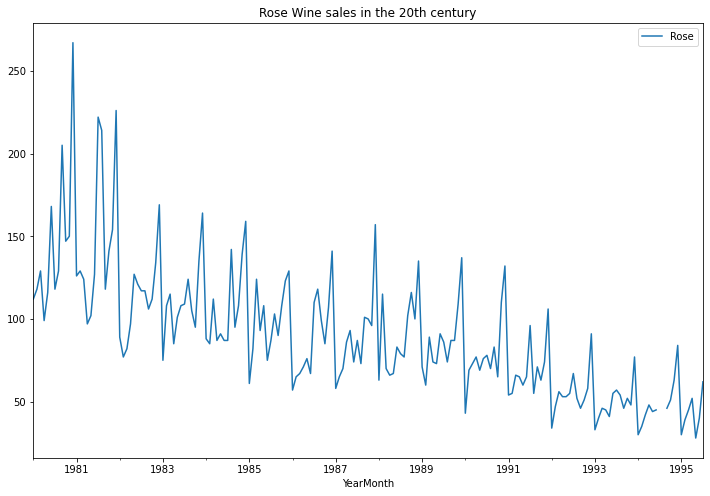

In [6]:
df.plot()
plt.title('Rose Wine sales in the 20th century');

In [7]:
df.isnull().sum()

Rose    2
dtype: int64

In [8]:
row_null = df. isnull()
row_has_null = row_null.any(axis=1)
rows_having_null = df[row_has_null]
rows_having_null

Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN

let's impute it by Linear Interpolation method

In [9]:
df= df.interpolate() #

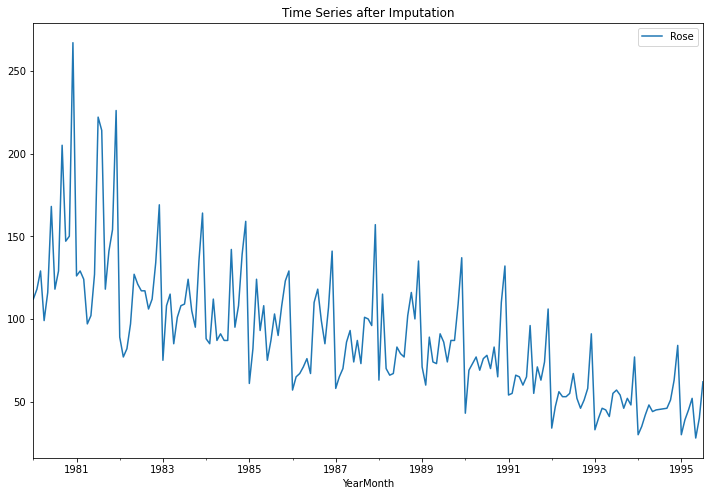

In [10]:
df.plot()
plt.title('Time Series after Imputation');

In [11]:
df['1994']

Rose
YearMonth            
1994-01-01  30.000000
1994-02-01  35.000000
1994-03-01  42.000000
1994-04-01  48.000000
1994-05-01  44.000000
1994-06-01  45.000000
1994-07-01  45.333333
1994-08-01  45.666667
1994-09-01  46.000000
1994-10-01  51.000000
1994-11-01  63.000000
1994-12-01  84.000000

## Mean and Median of Monthly Wine Sales

In [12]:
df.mean()

Rose    89.914439
dtype: float64

In [13]:
print(f'The mean monthly Wine Sales across years is {df.mean().values[0]}')  #df.mean()

The mean monthly Wine Sales across years is 89.9144385026738


In [14]:
print(f'The median monthly Wine Sales across years is {df.median().values[0]}')  # df.median()

The median monthly Wine Sales across years is 85.0


## Monthly Observations for year 1956

In [15]:
df['1981']

Rose
YearMonth        
1981-01-01  126.0
1981-02-01  129.0
1981-03-01  124.0
1981-04-01   97.0
1981-05-01  102.0
1981-06-01  127.0
1981-07-01  222.0
1981-08-01  214.0
1981-09-01  118.0
1981-10-01  141.0
1981-11-01  154.0
1981-12-01  226.0

## Boxplot of Monthly Sales for each year 

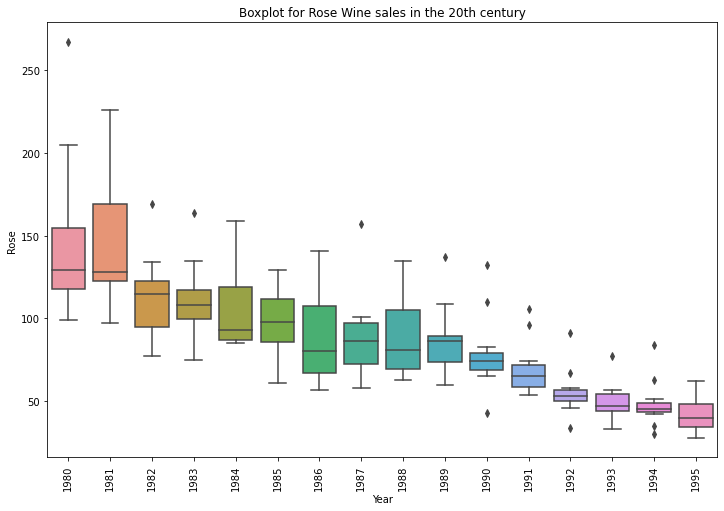

In [16]:
sns.boxplot(x=df.index.year, y=df['Rose'])
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.title('Boxplot for Rose Wine sales in the 20th century');

## Boxplot for each Calendar month across years

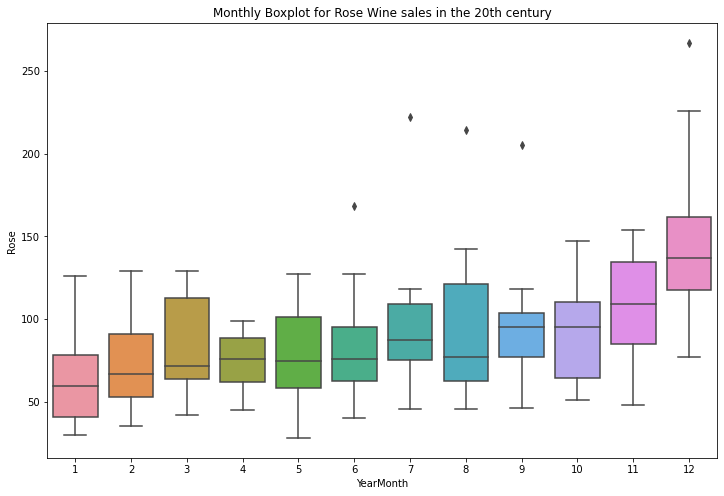

In [17]:
sns.boxplot(x=df.index.month, y=df['Rose'])
plt.title('Monthly Boxplot for Rose Wine sales in the 20th century');

## `monthplot` of the Time Series

In [18]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

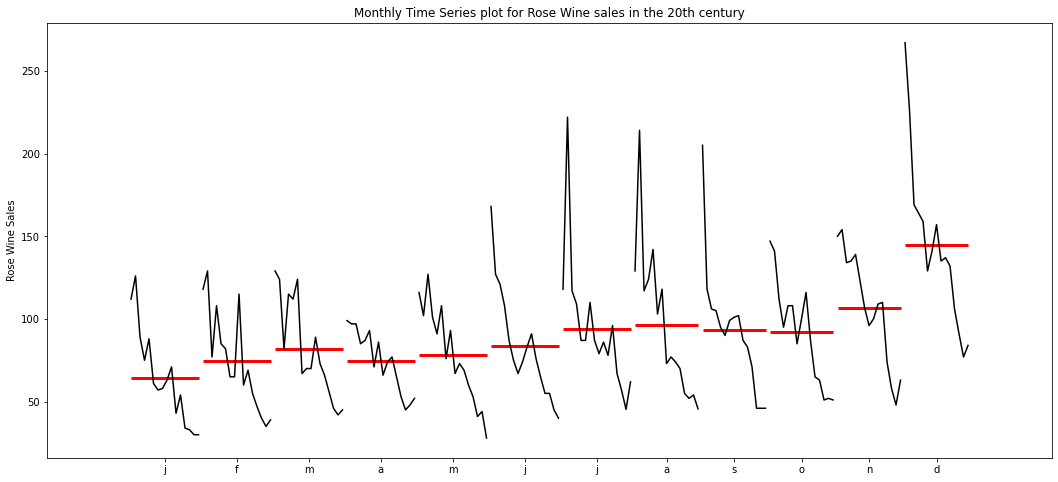

In [19]:
fig,ax = plt.subplots(figsize=(18,8))
month_plot(df, ylabel='Rose Wine Sales', ax=ax)
plt.title('Monthly Time Series plot for Rose Wine sales in the 20th century');

## Conversion of Monthly Data to other periodicity

We will do this using the resample method of pandas dataframe.

### Quarterly

In [20]:
df_quarterly_sum = df.resample('Q').sum()

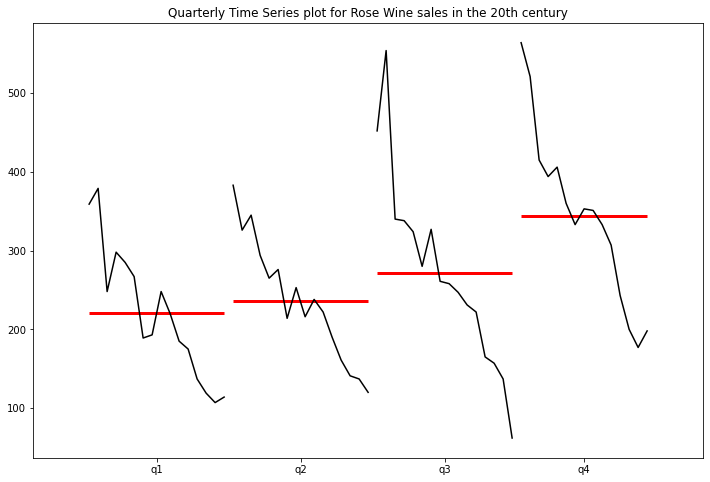

In [21]:
quarter_plot(df_quarterly_sum)
plt.title('Quarterly Time Series plot for Rose Wine sales in the 20th century');

In [22]:
df_quarterly_sum.head() # column heading is wrong..

Rose
YearMonth        
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0

In [23]:
df_quarterly_sum.columns = ['Rose Quarterly Wine Sales']

In [24]:
df_quarterly_sum.head()

Rose Quarterly Wine Sales
YearMonth                            
1980-03-31                      359.0
1980-06-30                      383.0
1980-09-30                      452.0
1980-12-31                      564.0
1981-03-31                      379.0

In [25]:
# df.plot();

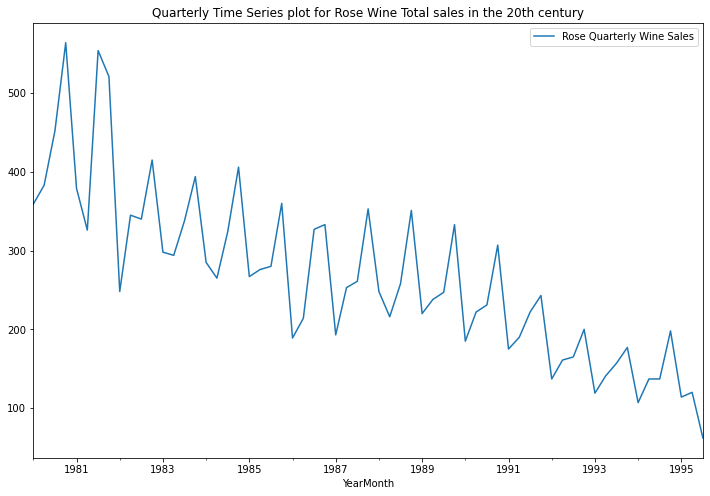

In [26]:
df_quarterly_sum.plot()
plt.title('Quarterly Time Series plot for Rose Wine Total sales in the 20th century');

### Yearly

In [27]:
df_yearly_sum = df.resample('Y').sum()

In [28]:
df_yearly_sum.head() #column heading is wrong

Rose
YearMonth         
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

In [29]:
df_yearly_sum.columns = ['Annual Rose Wine Sales']

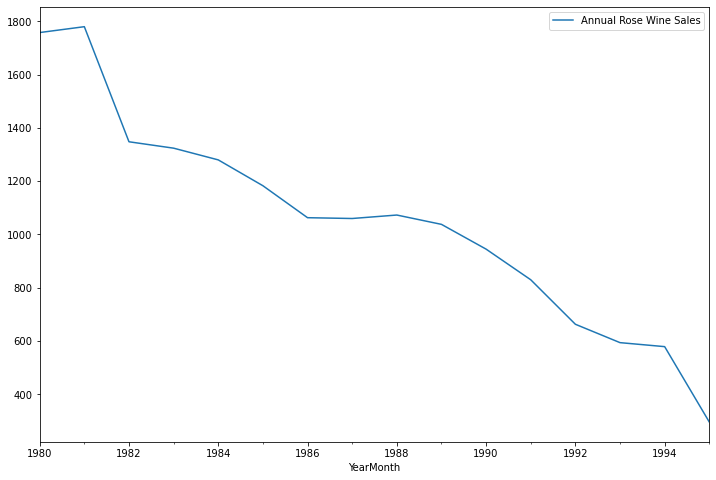

In [30]:
df_yearly_sum.plot();

### Average Yearly Sales across years

In [31]:
df_yearly_mean = df.resample('Y').mean()

In [32]:
df_yearly_mean.head() # column header is wrong..

Rose
YearMonth             
1980-12-31  146.500000
1981-12-31  148.333333
1982-12-31  112.333333
1983-12-31  110.333333
1984-12-31  106.666667

In [33]:
df_yearly_mean.columns = ['Average Yearly Sales']

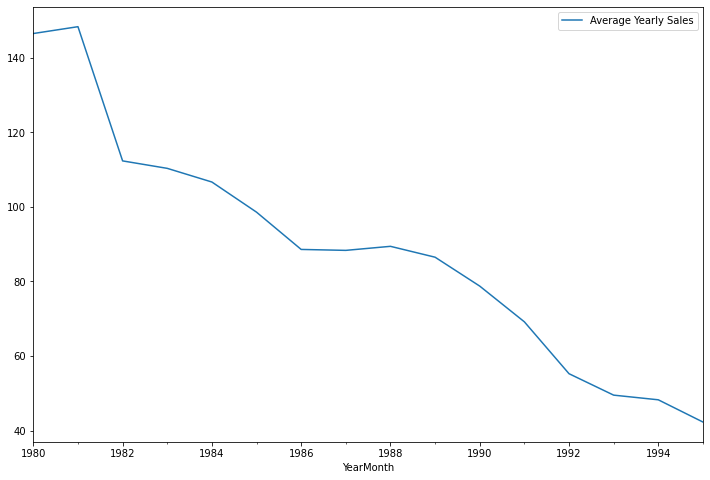

In [34]:
df_yearly_mean.plot();

The resampled annual figures have smoothened out the seasonality variations and we are able to see only the year on year trends in Sales (both annual totals as well as monthly average for each year).

### Daily

In [35]:
df_daily_sum = df.resample('D').sum()
df_daily_sum.head()

Rose
YearMonth        
1980-01-01  112.0
1980-01-02    0.0
1980-01-03    0.0
1980-01-04    0.0
1980-01-05    0.0

Note, that we only have monthly data for each year and we are asking python to give us daily data for each month. Since this is not possible, we are getting the monthly figure for that month assigned to a particular day and for the rest of the days in the month, the value assigned is zero. This is the default behaviour.

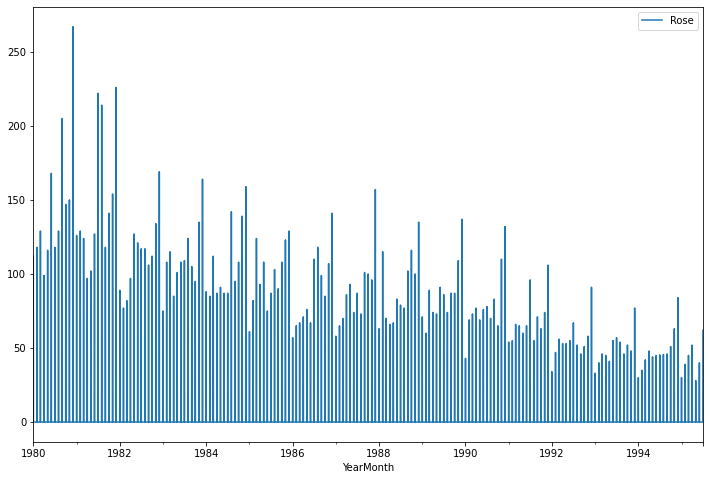

In [36]:
# plotting this is not going to be very useful
df_daily_sum.plot();

# 5 years Time Series Plot

In [37]:
df_5_sum = df.resample('5Y').sum()
df_5_sum.columns = ['Five years Wine Sales']
df_5_sum.head()

Five years Wine Sales
YearMonth                        
1980-12-31                 1758.0
1985-12-31                 6915.0
1990-12-31                 5179.0
1995-12-31                 2962.0

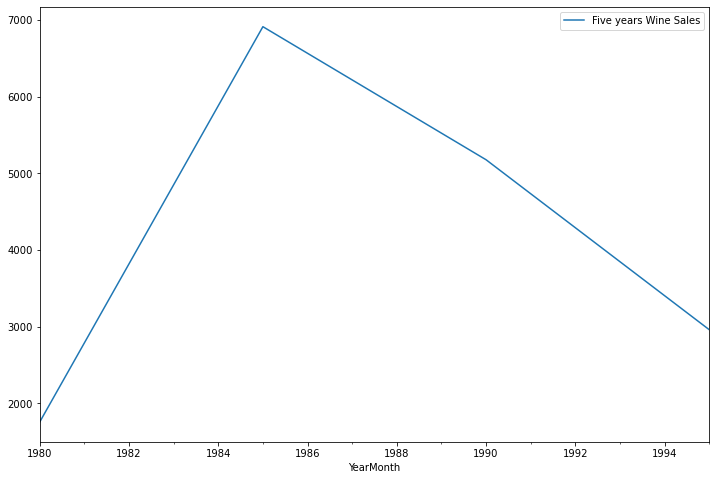

In [38]:
df_5_sum.plot();

### Decade

In [39]:
df_decade_sum = df.resample('10Y').sum()
df_decade_sum.columns = ['Decade Rose Wine Sales']
df_decade_sum.head()

Decade Rose Wine Sales
YearMonth                         
1980-12-31                  1758.0
1990-12-31                 12094.0
2000-12-31                  2962.0

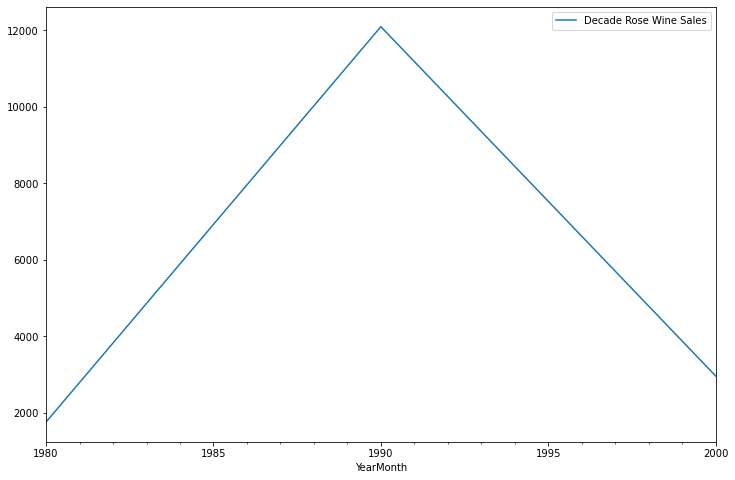

In [40]:
df_decade_sum.plot();

# Plot a graph of monthly Wine Sales across years

In [41]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

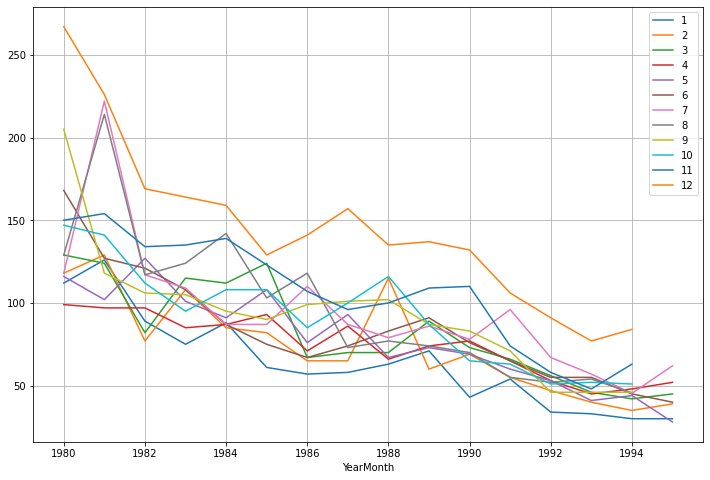

In [42]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

## Plot the Empirical Cumulative Distribution

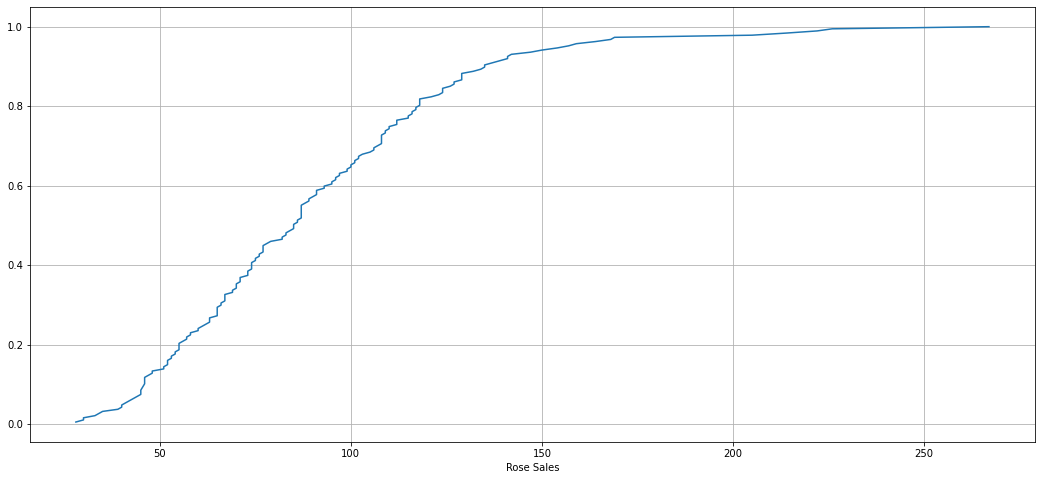

In [43]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

## Plot the average Wine Sales per month and the month on month percentage change of Wine Sales.

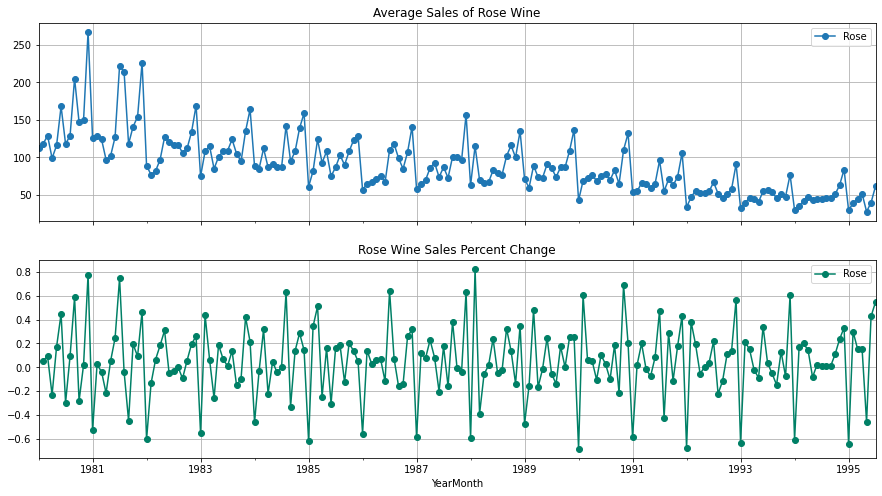

In [44]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales of Rose Wine",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Wine Sales Percent Change",grid=True)

The above two graphs tells us the Average 'Wine Sales' and the Percentage change of 'Wine Sales' with respect to the time.

## Time Series Decomposition

### Additive Model

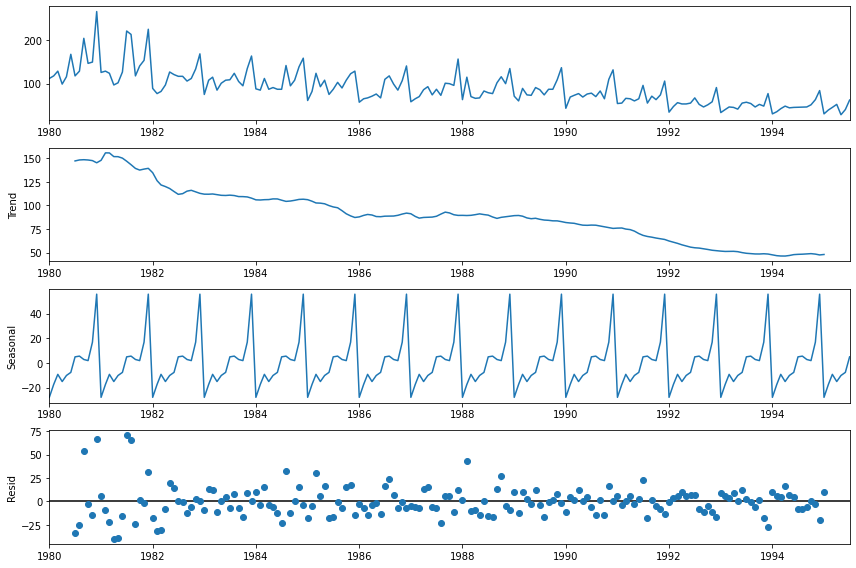

In [45]:
add_decom = seasonal_decompose(df, model='additive')
add_decom.plot();

As per the 'additive' decomposition, we see that there is a pronounced trend in the earlier years of the data. There is a seasonality as well.

In [46]:
trend = add_decom.trend
trend.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64

In [47]:
add_decom.trend[465:]

Series([], Name: trend, dtype: float64)

In [48]:
seasonality = add_decom.seasonal
seasonality[:10]

YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
Name: seasonal, dtype: float64

In [49]:
residual = add_decom.resid
residual.head(12)

YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.161425
Name: resid, dtype: float64

### De-Seasonalized Time Series

In [50]:
deseasonalized_ts = trend + residual
deseasonalized_ts[:20]

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    113.103092
1980-08-01    123.500314
1980-09-01    202.225314
1980-10-01    145.128092
1980-11-01    133.153092
1980-12-01    211.286425
1981-01-01    153.908647
1981-02-01    146.435632
1981-03-01    133.285830
1981-04-01    112.098330
1981-05-01    112.196544
1981-06-01    134.678687
1981-07-01    217.103092
1981-08-01    208.500314
dtype: float64

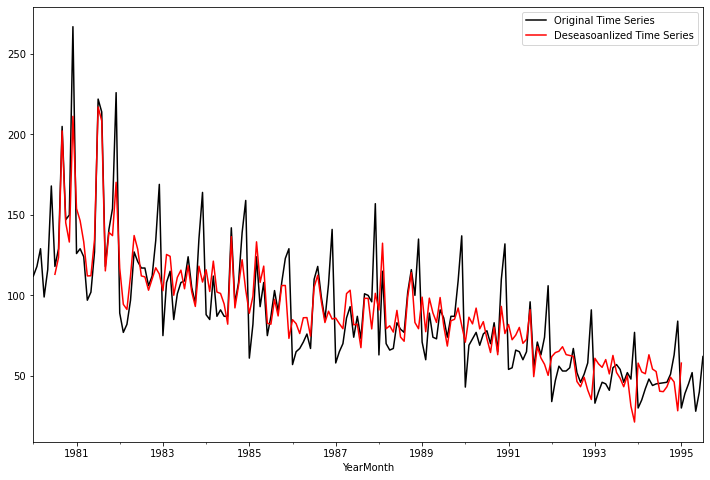

In [51]:
df.plot(color='black')
deseasonalized_ts.plot(color='red');
plt.legend(['Original Time Series', 'Deseasoanlized Time Series']);

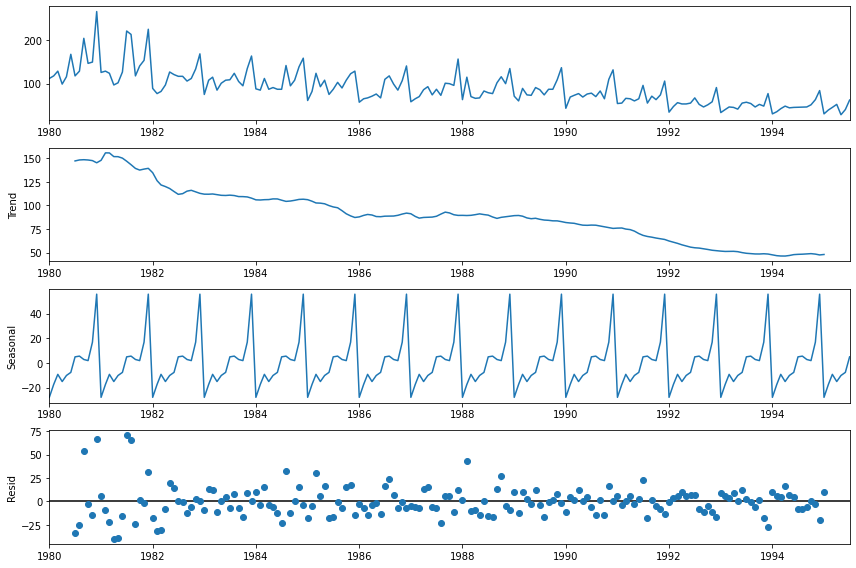

In [52]:
mult_decom =seasonal_decompose(df, model = 'additive')
mult_decom.plot();



In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

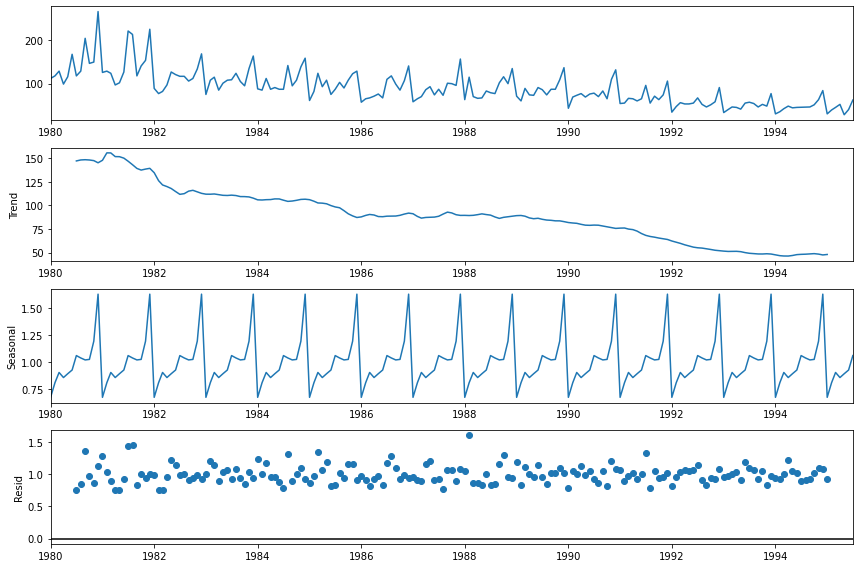

In [54]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [55]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

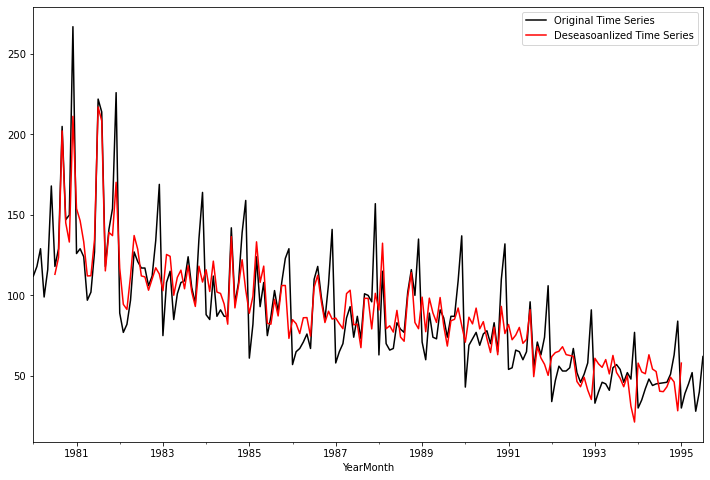

In [56]:
df.plot(color='black')
deseasonalized_ts.plot(color='red');
plt.legend(['Original Time Series', 'Deseasoanlized Time Series']);

# Train - Test Split & Plot

In [57]:
df.shape

(187, 1)

In [58]:
train = df[df.index.year < 1991] 
test = df[df.index.year >= 1991]

In [59]:
train.shape, test.shape

((132, 1), (55, 1))

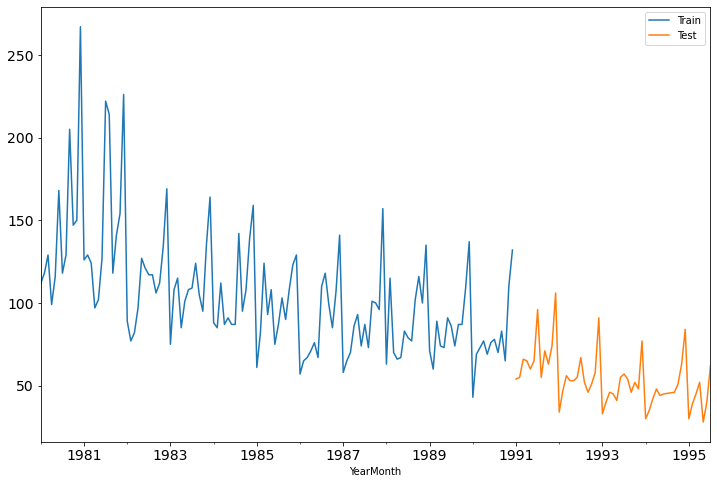

In [60]:
train['Rose'].plot(legend = True, label = 'Train', fontsize =14)
test['Rose'].plot(legend = True,label = 'Test', fontsize = 14);

**Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.**

# Building different models and comparing the accuracy metrics.

##  Model 1: Linear Regression

For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [61]:
train_time = [i+1 for i in range(len(train))] # 1 to 132
test_time = [i+133 for i in range(len(test))] # 133 to 187
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [62]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [63]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [64]:
LinearRegression_train.head()

Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

In [65]:
LinearRegression_train.tail()

Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

In [66]:
LinearRegression_test.head()

Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137

In [67]:
LinearRegression_test.tail()

Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

Now that our training and test data has been modified, let us go ahead use Linear Regression to build the model on the training data and test the model on the test data.

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

In [70]:
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['Reg On Time Instances of Rose wine data'] = test_predictions_model1.round(2)

In [71]:
LinearRegression_test.head()

Rose  time  Reg On Time Instances of Rose wine data
YearMonth                                                      
1991-01-01  54.0   133                                    72.06
1991-02-01  55.0   134                                    71.57
1991-03-01  66.0   135                                    71.07
1991-04-01  65.0   136                                    70.58
1991-05-01  60.0   137                                    70.09

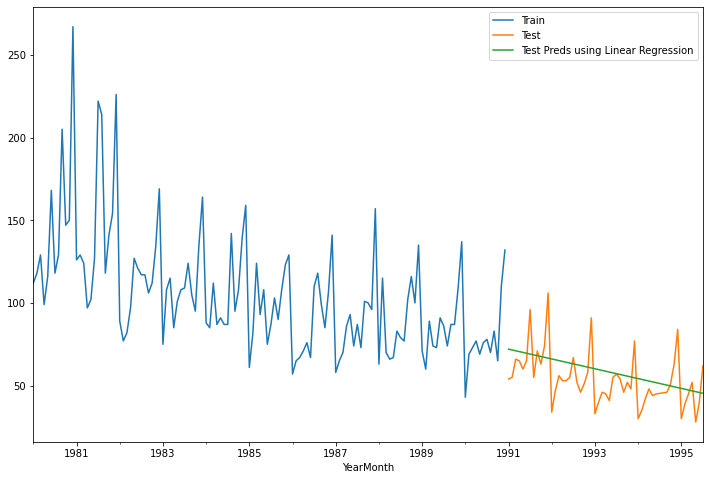

In [72]:
train['Rose'].plot(legend = True, label = 'Train')
test['Rose'].plot(legend = True, label = 'Test')
LinearRegression_test['Reg On Time Instances of Rose wine data'].plot(legend = True, 
                                        label = 'Test Preds using Linear Regression');

## Accuracy metrics for Linear Regression

In [73]:
# from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse # we can also use sklearn.metrics mse, np.sqrt, mse(squared = false)

## Model Evaluation

In [74]:
## Test Data - RMSE

rmse_model1_test = rmse(test['Rose'],test_predictions_model1)
rmse_model1_test

15.268955197146555

In [75]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},
                         index=['Reg On Time Instances of Rose wine data'])
resultsDf

Test RMSE
Reg On Time Instances of Rose wine data  15.268955

# Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [76]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [77]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1] # taking the last value from train data
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

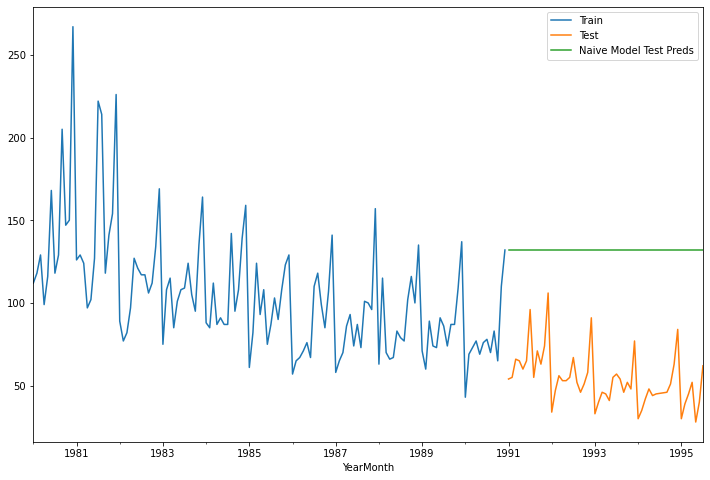

In [78]:
train['Rose'].plot(legend = True, label = 'Train')
test['Rose'].plot(legend = True, label = 'Test')
NaiveModel_test['naive'].plot(legend = True, label = 'Naive Model Test Preds');

## Model Evaluation- Naive Approach

In [79]:
## Test Data - RMSE

rmse_model2_test=rmse(test['Rose'],NaiveModel_test['naive'])
rmse_model2_test

79.71877337417347

In [80]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Reg On Time Instances of Rose wine data  15.268955
NaiveModel                               79.718773

# Model 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values

In [81]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [82]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

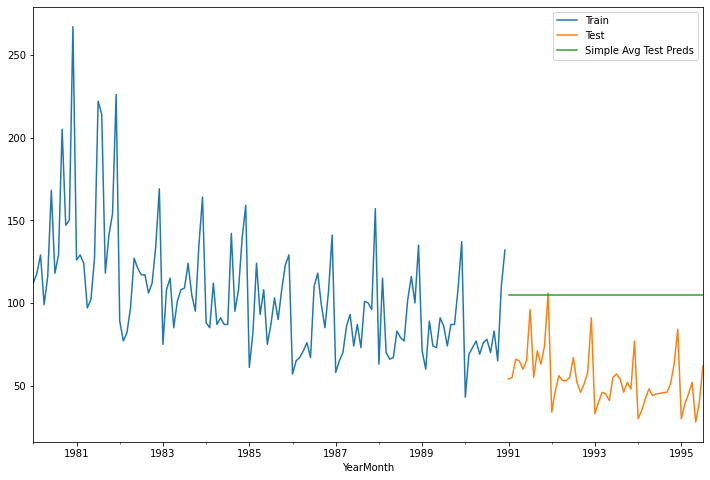

In [83]:
train['Rose'].plot(legend = True, label = 'Train')
test['Rose'].plot(legend = True, label = 'Test')
SimpleAverage_test['mean_forecast'].plot(legend=True,
                                         label= 'Simple Avg Test Preds');

## Model Evaluation - Simple Average Approach

In [84]:
## Test Data - RMSE 

rmse_model3_test = rmse(test['Rose'], 
                        SimpleAverage_test['mean_forecast'])
rmse_model3_test

53.460569646114436

In [85]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Reg On Time Instances of Rose wine data  15.268955
NaiveModel                               79.718773
SimpleAverageModel                       53.460570

# Model 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [86]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

## Trailing moving averages

In [87]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head(20)

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0      114.50         NaN         NaN
1980-05-01  116.0       107.5      115.50         NaN         NaN
1980-06-01  168.0       142.0      128.00  123.666667         NaN
1980-07-01  118.0       143.0      125.25  124.666667         NaN
1980-08-01  129.0       123.5      132.75  126.500000         NaN
1980-09-01  205.0       167.0      155.00  139.166667  132.666667
1980-10-01  147.0       176.0      149.75  147.166667  136.555556
1980-11-01  150.0       148.5      157.75  152.833333  140.111111
1980-12-01  267.0       208.5      192.25  169.333333  155.444444
1981-01-01  126.0       196.5      172.50  170.666667  158.444444
1981-02-01  129.0       127.5      168.00  170.666667  159.888889
1981-03-01  124.0       126.5      161.50  157.166667  155.000000
1981-04-01   97.0       110.5      119.00  148.833333  152.666667
1981-05-01  102.0        99.5      113.00  140.833333  149.666667
1981-06-01  127.0       114.5      112.50  117.500000  141.000000
1981-07-01  222.0       174.5      137.00  133.500000  149.333333
1981-08-01  214.0       218.0      166.25  147.666667  156.444444

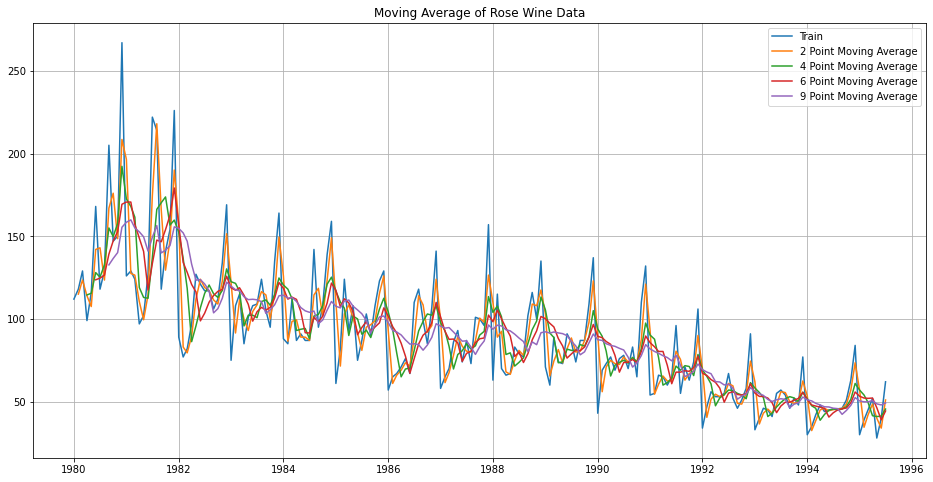

In [88]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid()
plt.title("Moving Average of Rose Wine Data" );

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [89]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[df.index.year >= 1991]

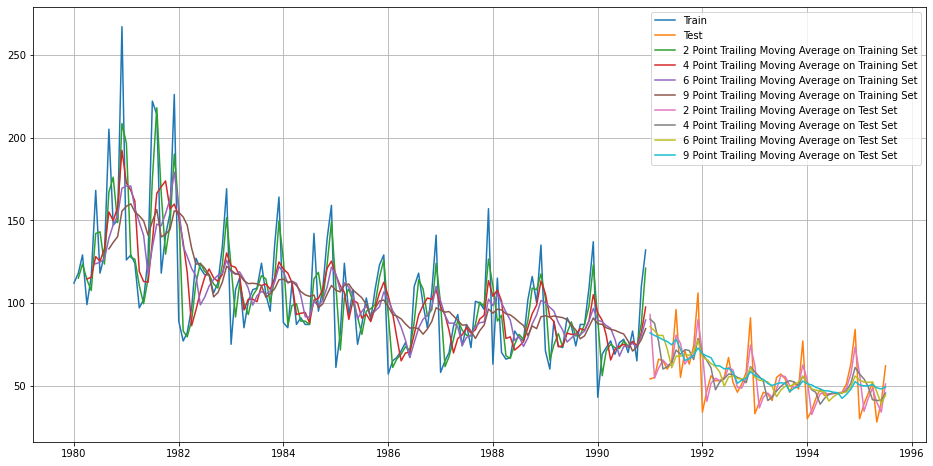

In [90]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

## Model Evaluation --Moving Average(MA)

In [91]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = rmse(test['Rose'],
                          trailing_MovingAverage_test['Trailing_2'])
rmse_model4_test_2

11.52927761935857

In [92]:
## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = rmse(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
rmse_model4_test_4

14.451403238286431

In [93]:
## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = rmse(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
rmse_model4_test_6

14.566327265691354

In [94]:
## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = rmse(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
rmse_model4_test_9

14.727629822363193

In [95]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, rmse_model4_test_4,rmse_model4_test_6, rmse_model4_test_9]}, index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Reg On Time Instances of Rose wine data  15.268955
NaiveModel                               79.718773
SimpleAverageModel                       53.460570
2pointTrailingMovingAverage              11.529278
4pointTrailingMovingAverage              14.451403
6pointTrailingMovingAverage              14.566327
9pointTrailingMovingAverage              14.727630

Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

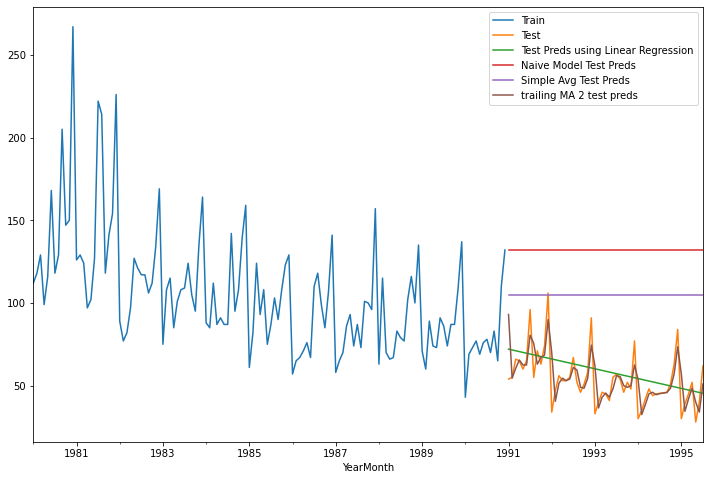

In [96]:
train['Rose'].plot(legend = True, label = 'Train')

test['Rose'].plot(legend = True, label = 'Test')

LinearRegression_test['Reg On Time Instances of Rose wine data'].plot(legend = True, label = 'Test Preds using Linear Regression')

NaiveModel_test['naive'].plot(legend = True, label = 'Naive Model Test Preds')

SimpleAverage_test['mean_forecast'].plot(legend=True,
                                         label= 'Simple Avg Test Preds')

trailing_MovingAverage_test['Trailing_2'].plot(legend=True,
                                              label ='trailing MA 2 test preds');

# Model 5: Simple Exponential Smoothing

In [97]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [98]:
SES_train = train.copy()
SES_test = test.copy()

In [99]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [100]:
model_SES_autofit = model_SES.fit()

In [101]:
model_SES_autofit.params

{'smoothing_level': 0.09874985002628338,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38726392126804,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [102]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  87.104998
1991-02-01  55.0  87.104998
1991-03-01  66.0  87.104998
1991-04-01  65.0  87.104998
1991-05-01  60.0  87.104998

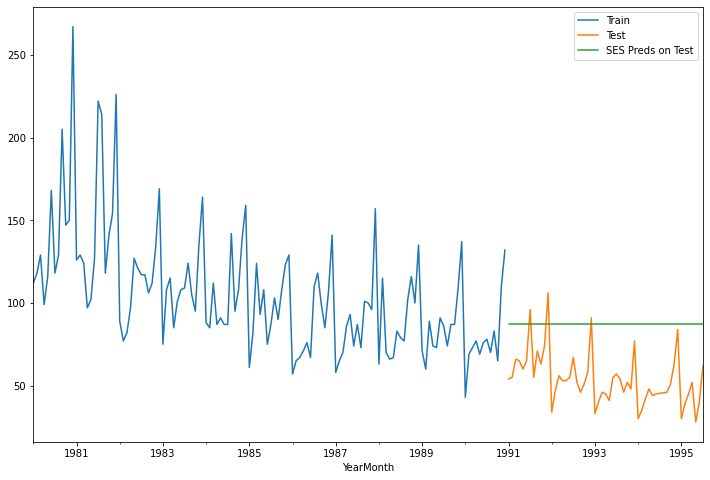

In [103]:
SES_train['Rose'].plot(legend=True, label = 'Train')
SES_test['Rose'].plot(legend=True, label = 'Test')
SES_test['predict'].plot(legend=True, label = 'SES Preds on Test');

#  Model Evaluation for Simple Exponential Smoothing

In [104]:
## Test Data

rmse_model5_test_1 = rmse(SES_test['Rose'],SES_test['predict'])
rmse_model5_test_1

36.796240874561235

In [105]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.09,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Reg On Time Instances of Rose wine data  15.268955
NaiveModel                               79.718773
SimpleAverageModel                       53.460570
2pointTrailingMovingAverage              11.529278
4pointTrailingMovingAverage              14.451403
6pointTrailingMovingAverage              14.566327
9pointTrailingMovingAverage              14.727630
Alpha=0.09,SimpleExponentialSmoothing    36.796241

Setting different alpha values:

Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [106]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [107]:
for i in np.arange(0.0,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,
                                      optimized=False,use_brute=True)
    
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = rmse(SES_train['Rose'],
                               SES_train['predict',i])
    
    rmse_model5_test_i = rmse(SES_test['Rose'],
                              SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,
                                      'Train RMSE': rmse_model5_train_i,'Test RMSE':rmse_model5_test_i}, 
                                     ignore_index=True)

In [108]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
1           0.1   31.815610  36.828033
2           0.2   31.979391  41.361876
3           0.3   32.470164  47.504821
4           0.4   33.035130  53.767406
5           0.5   33.682839  59.641786
0           0.0   36.719452  60.243378
6           0.6   34.441171  64.971288
7           0.7   35.323261  69.698162
8           0.8   36.334596  73.773992
9           0.9   37.482782  77.139276

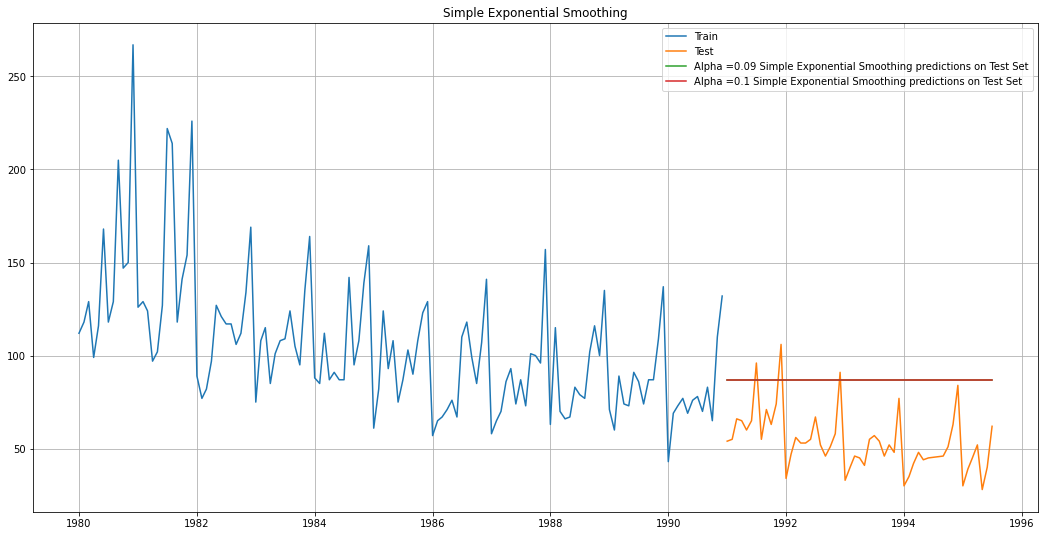

In [109]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict',0.1], label='Alpha =0.09 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.title("Simple Exponential Smoothing")


plt.legend(loc='best')
plt.grid();

From Both Bruteforce method as well as model default alpha values are 0.1 so the lines are overlaaping on each other 

In [110]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],
 ascending=True).values[0][2]]}
                           ,index = ['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
Reg On Time Instances of Rose wine data  15.268955
NaiveModel                               79.718773
SimpleAverageModel                       53.460570
2pointTrailingMovingAverage              11.529278
4pointTrailingMovingAverage              14.451403
6pointTrailingMovingAverage              14.566327
9pointTrailingMovingAverage              14.727630
Alpha=0.09,SimpleExponentialSmoothing    36.796241
Alpha=0.1,SimpleExponentialSmoothing     36.828033

# Model 6: Double Exponential Smoothing (Holt's Model)

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [111]:
DES_train = train.copy()
DES_test = test.copy()

In [112]:
model_DES = Holt(DES_train['Rose'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [113]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [114]:
for i in np.arange(0.0,1.1,0.1):
    for j in np.arange(0.0,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,
                                            smoothing_slope=j, 
                                            optimized=False, 
                                            use_brute=True)
        
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test))
        
        rmse_model6_train = rmse(DES_train['Rose'],
                                 DES_train['predict',i,j])
        
        rmse_model6_test = rmse(DES_test['Rose'],
                                DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,
                                          'Beta Values':j,
                                          'Train RMSE': rmse_model6_train,
                                          'Test RMSE': rmse_model6_test}, ignore_index=True)

In [115]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
12           0.1          0.1   34.439111  36.923416
13           0.1          0.2   33.450729  48.688648
23           0.2          0.1   33.097427  65.731702
14           0.1          0.3   33.145789  78.156641
34           0.3          0.1   33.611269  98.653317

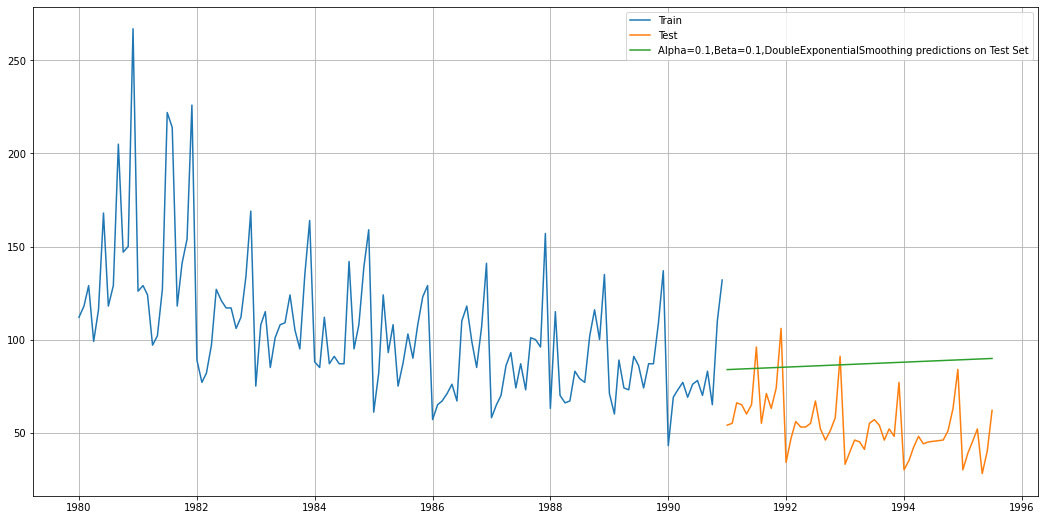

In [116]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1],
         label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [117]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
Reg On Time Instances of Rose wine data        15.268955
NaiveModel                                     79.718773
SimpleAverageModel                             53.460570
2pointTrailingMovingAverage                    11.529278
4pointTrailingMovingAverage                    14.451403
6pointTrailingMovingAverage                    14.566327
9pointTrailingMovingAverage                    14.727630
Alpha=0.09,SimpleExponentialSmoothing          36.796241
Alpha=0.1,SimpleExponentialSmoothing           36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  36.923416

# Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

We will calculate Three parameters  𝛼 ,  𝛽  and  𝛾   in this model. Level, Trend and Seasonality are accounted for in this model.

In [118]:
TES_train = train.copy()
TES_test = test.copy()

In [119]:
model_TES = ExponentialSmoothing(TES_train['Rose'],
                                 trend='multiplicative',
                                 seasonal='multiplicative')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [120]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [121]:
model_TES_autofit.params

{'smoothing_level': 0.0699907273726479,
 'smoothing_slope': 6.43068844756288e-32,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65524100948767,
 'initial_slope': 0.993901606624285,
 'initial_seasons': array([1.45276887, 1.64479258, 1.79984324, 1.57565187, 1.77043595,
        1.91047634, 2.10184262, 2.24624656, 2.11476411, 2.07406551,
        2.41683462, 3.3125958 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [122]:
model_TES_autofit.params['smoothing_slope'].round(15)

0.0

In [123]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test)).round(0)

TES_test.head()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0          54.0
1991-02-01  55.0          61.0
1991-03-01  66.0          66.0
1991-04-01  65.0          58.0
1991-05-01  60.0          64.0

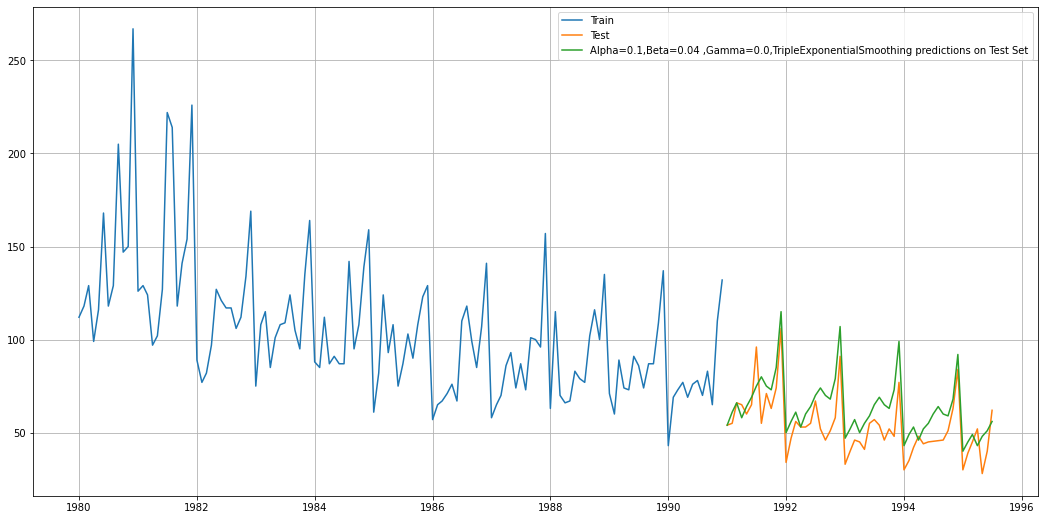

In [124]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.1,Beta=0.04 ,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [125]:
## Test Data

rmse_model6_test_1 = rmse(TES_test['Rose'],
                          TES_test['auto_predict'])
rmse_model6_test_1

12.7708633026491

In [126]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.1,Beta=0.04 ,Gamma=0.00001,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
Reg On Time Instances of Rose wine data             15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.09,SimpleExponentialSmoothing               36.796241
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.1,Beta=0.04 ,Gamma=0.00001,TripleExpone...  12.770863

In [127]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [128]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,
                                                  smoothing_slope=j,
                                                  smoothing_seasonal=k,
                                                  optimized=False,
                                                  use_brute=True)
            
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test))
        
            rmse_model8_train = rmse(TES_train['Rose'],
                                     TES_train['predict',i,j,k])
            
            rmse_model8_test = rmse(TES_test['Rose'],
                                    TES_test['predict',i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,
                                                  'Beta Values':j,
                                                  'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,
                                                  'Test RMSE':rmse_model8_test},ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py:40: RuntimeWarning: overflow encountered in square
  return np.mean((x1-x2)**2, axis=axis)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:907: RuntimeWarning: overflow encountered in multiply
  trend = trended(lvls, b)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:906: RuntimeWarning: overflow encountered in power
  b[nobs:] = dampen(b[nobs], phi_h)


In [129]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values     Train RMSE      Test RMSE
0             0.1          0.1           0.1   2.535287e+01   1.475361e+01
1             0.1          0.1           0.2   2.414392e+01   1.388958e+01
2             0.1          0.1           0.3   2.371053e+01   1.384262e+01
3             0.1          0.1           0.4   2.363229e+01   1.412833e+01
4             0.1          0.1           0.5   2.378453e+01   1.462818e+01
..            ...          ...           ...            ...            ...
895           1.0          0.9           0.6   4.378188e+03   2.053679e+22
896           1.0          0.9           0.7   3.174410e+05   4.657636e+28
897           1.0          0.9           0.8   1.743951e+10  3.455517e+127
898           1.0          0.9           0.9   6.731361e+08            inf
899           1.0          0.9           1.0  4.068165e+120            inf

[900 rows x 5 columns]

In [130]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
161           0.2          0.8           0.2   31.099271   9.086461
151           0.2          0.7           0.2   30.330487   9.103734
213           0.3          0.4           0.4   29.861485  10.317563
195           0.3          0.2           0.6   28.275521  10.346639
196           0.3          0.2           0.7   29.298814  11.529316

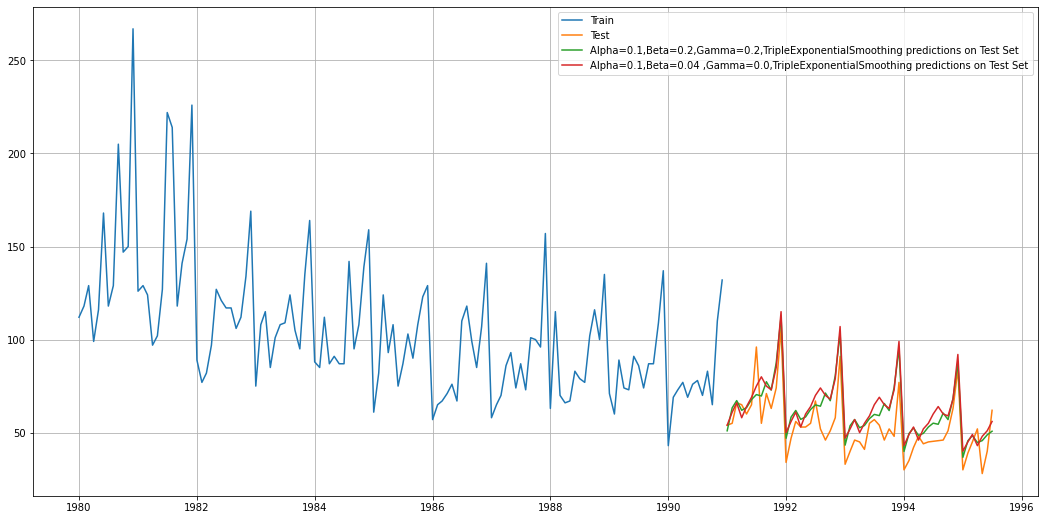

In [131]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha=0.1,Beta=0.04 ,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [132]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf


Test RMSE
Reg On Time Instances of Rose wine data             15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.09,SimpleExponentialSmoothing               36.796241
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.1,Beta=0.04 ,Gamma=0.00001,TripleExpone...  12.770863
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.086461

In [133]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.086461
2pointTrailingMovingAverage                         11.529278
Alpha=0.1,Beta=0.04 ,Gamma=0.00001,TripleExpone...  12.770863
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Reg On Time Instances of Rose wine data             15.268955
Alpha=0.09,SimpleExponentialSmoothing               36.796241
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
SimpleAverageModel                                  53.460570
NaiveModel                                          79.718773

## We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.1,  𝛽  = 0.2 and  𝛾  = 0.2.

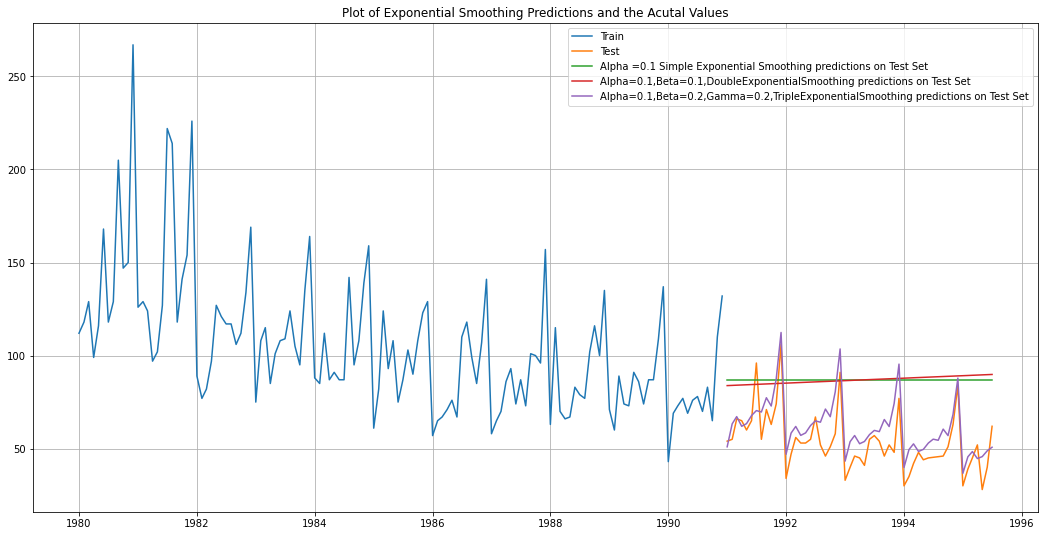

In [134]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

The two models to be built on the whole data are the following:

Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing\

2 point Trailing  Moving  Average

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [135]:

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

In [136]:
#let's first plot the Time Series

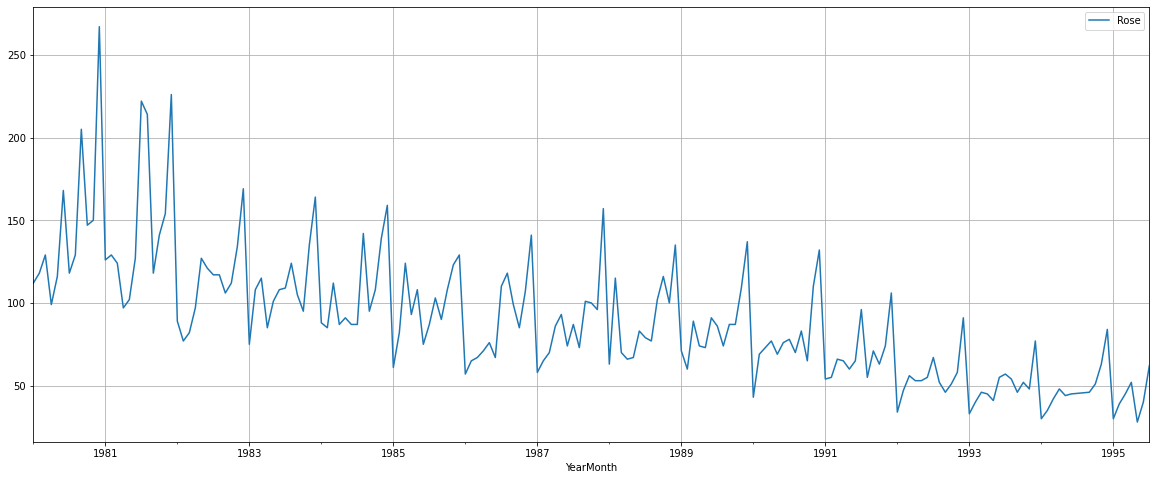

In [137]:
df.plot()
plt.grid();

We can see that there is a slight mixed (Upward & Downward) trend with a seasonal pattern associated as well.

## Decompose the Time Series and plot the different components.

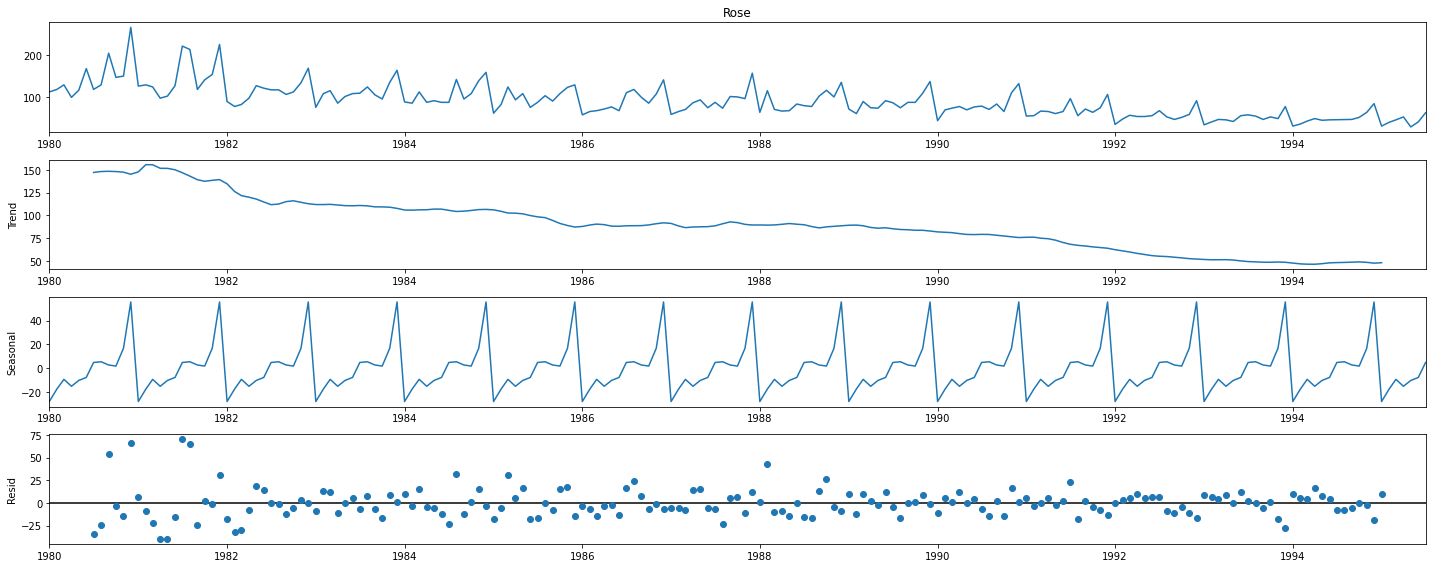

In [138]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

We see that the residuals are not randomly located around 0 from the plot of the residuals in the decomposition

In [139]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

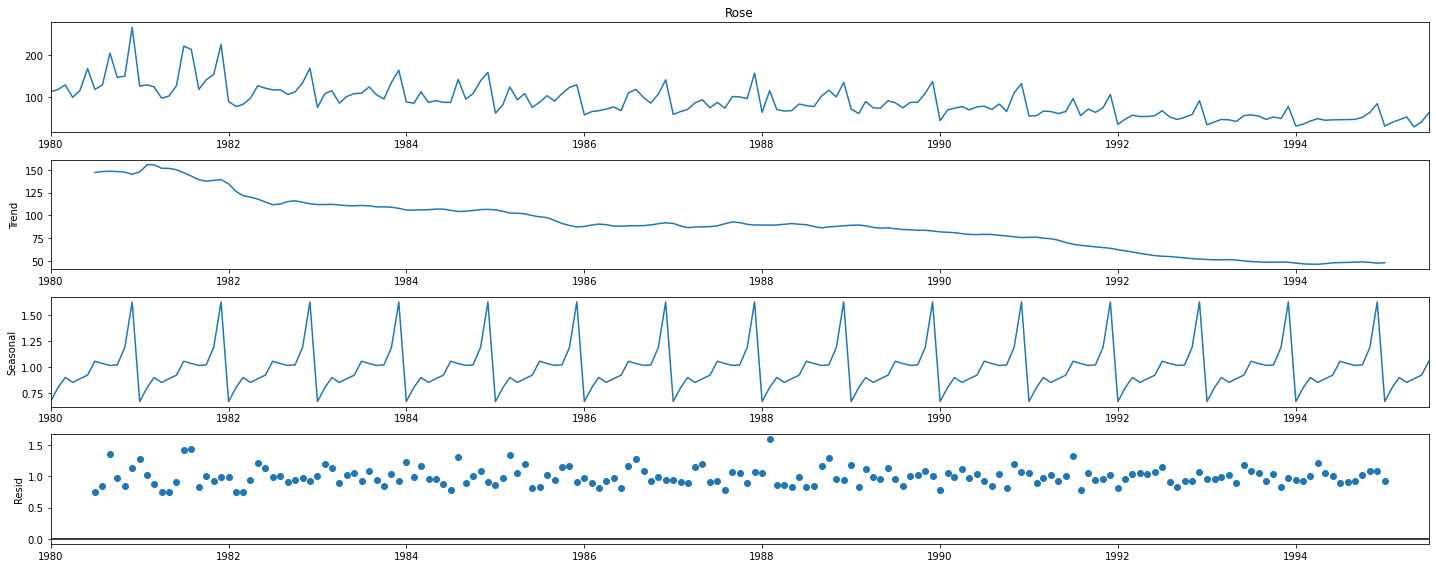

In [140]:
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

**We can see that the residuals are located Near 1 So series Will be multiplicative series**

In [141]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

### Check for stationarity of the whole Time Series data.

In [142]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

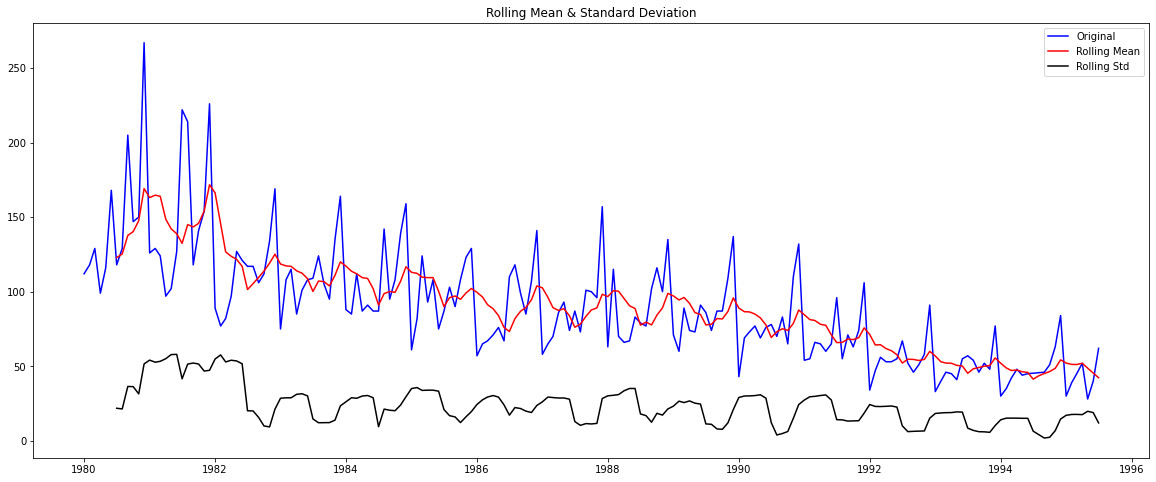

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [143]:
test_stationarity(df['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

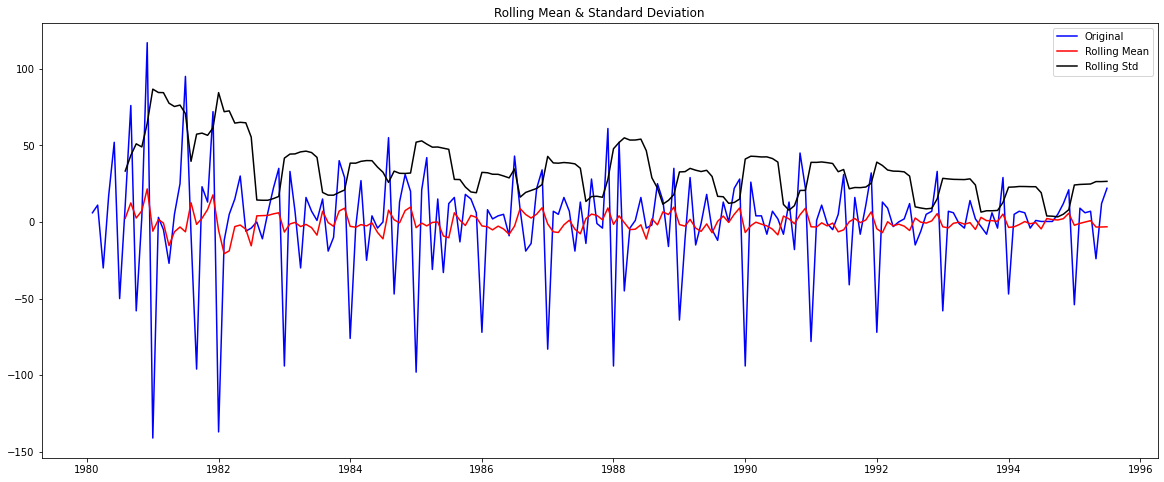

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [144]:
test_stationarity(df['Rose'].diff().dropna())

We see that at significance level 𝛼  = 0.05 the Time Series is  stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [145]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

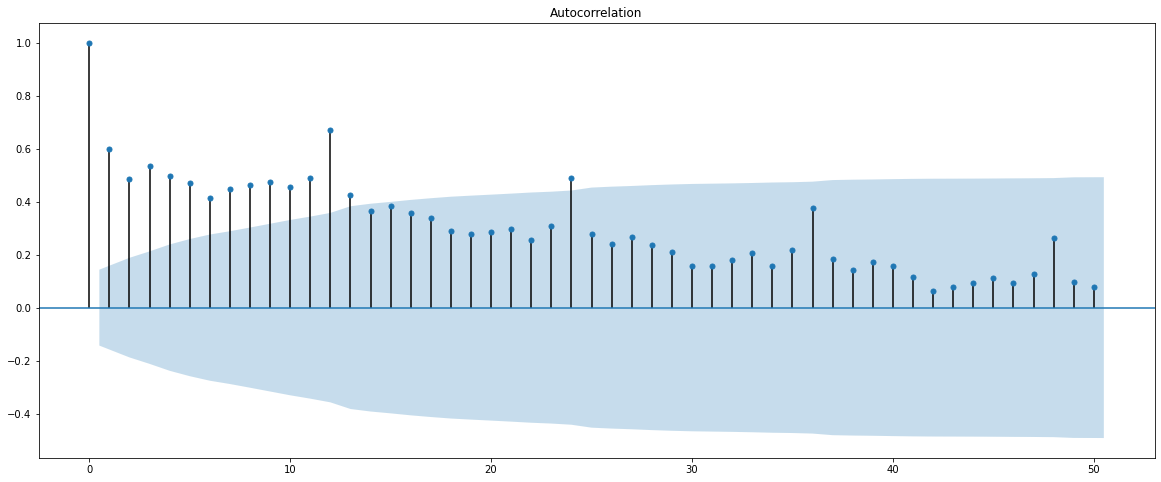

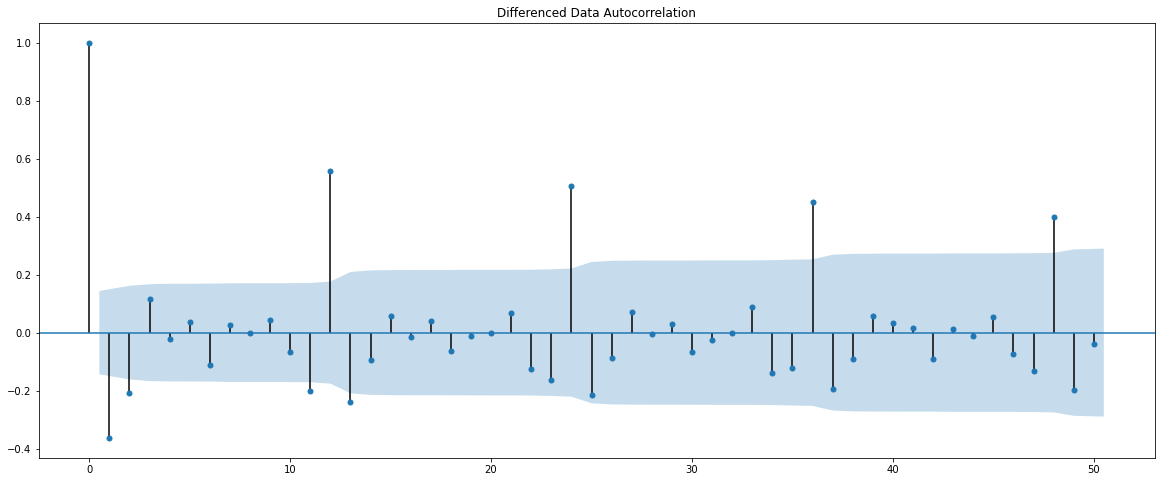

In [146]:
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

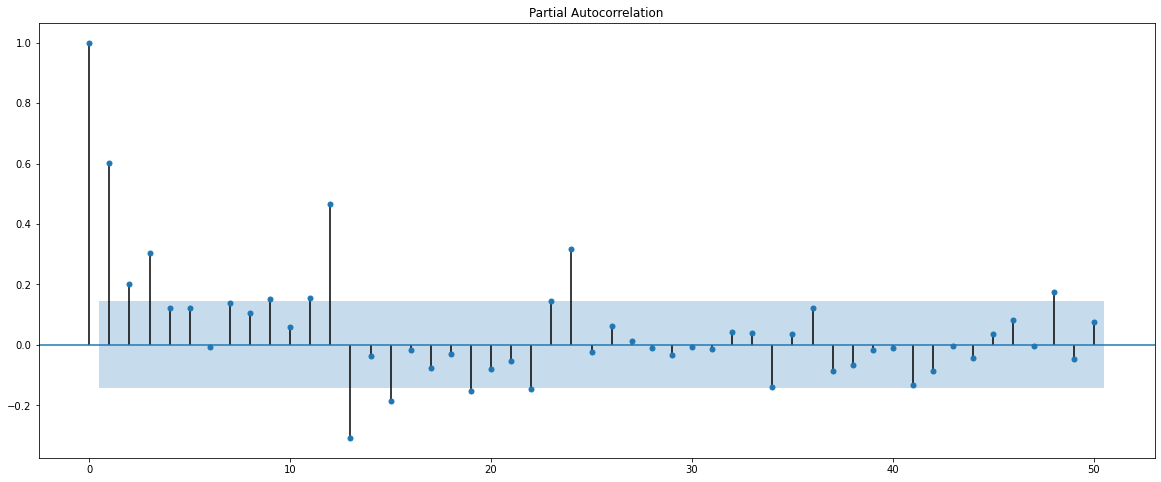

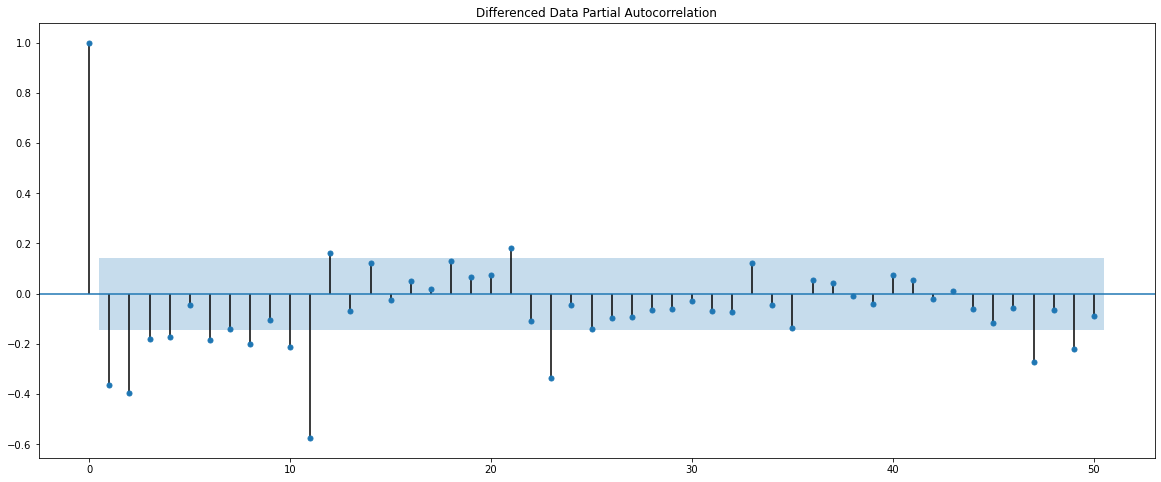

In [147]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

In [148]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [149]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [150]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


###  Check for stationarity of the Training Data Time Series.

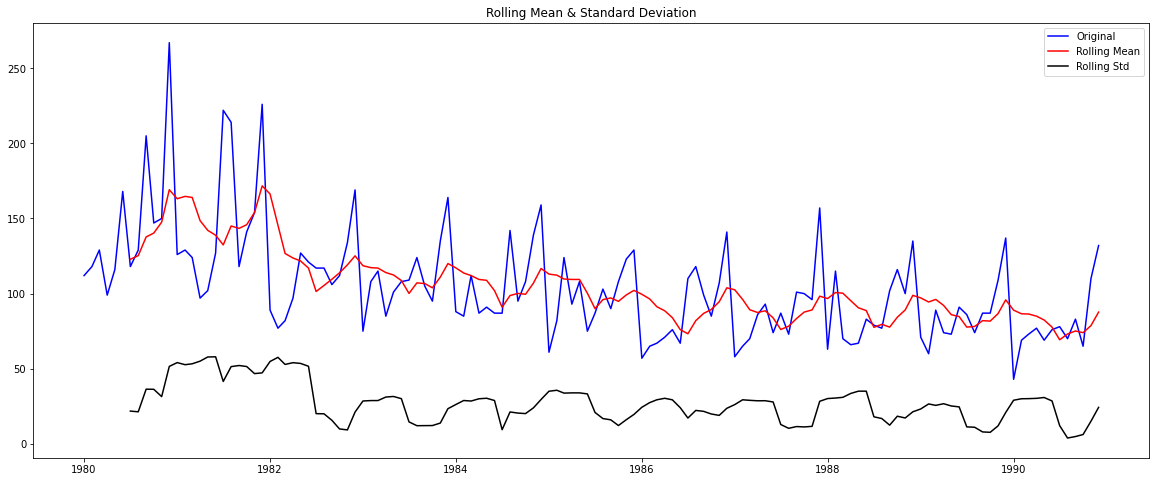

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [151]:
test_stationarity(train['Rose'])

We see that the series is not stationary at  𝛼  = 0.05.

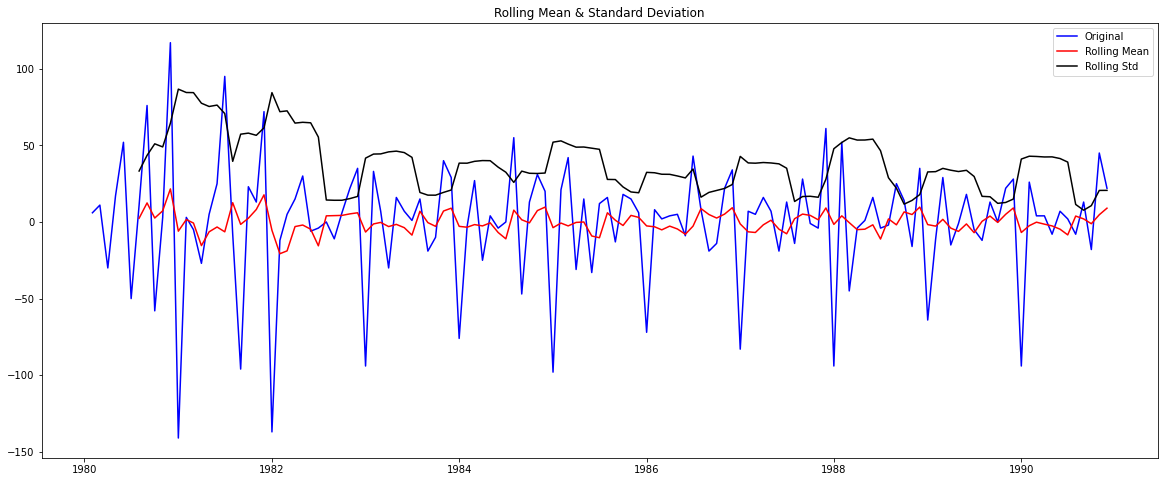

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [152]:
test_stationarity(train['Rose'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05.

In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [154]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [155]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [156]:
from statsmodels.tsa.arima_model import ARIMA

In [157]:
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'],
                        order=param).fit()
    
    print(f'ARIMA{param} - AIC:{ARIMA_model.aic}')
    
    ARIMA_AIC=ARIMA_AIC.append({'param':param, 
                                'AIC': ARIMA_model.aic},
                               ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464336
ARIMA(0, 1, 2) - AIC:1276.8353731090106
ARIMA(1, 1, 0) - AIC:1319.3483105801806


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1) - AIC:1277.7757528008215


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 2) - AIC:1277.3592236322227
ARIMA(2, 1, 0) - AIC:1300.609261174594


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 1) - AIC:1279.0456894093172


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 2) - AIC:1279.2986939365428


In [158]:
ARIMA_AIC

param          AIC
0  (0, 1, 0)  1335.152658
1  (0, 1, 1)  1280.726183
2  (0, 1, 2)  1276.835373
3  (1, 1, 0)  1319.348311
4  (1, 1, 1)  1277.775753
5  (1, 1, 2)  1277.359224
6  (2, 1, 0)  1300.609261
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694

In [159]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835373
5  (1, 1, 2)  1277.359224
4  (1, 1, 1)  1277.775753
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [160]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

results_auto_ARIMA.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 23 May 2021   AIC                           1276.835
Time:                        17:33:15   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.518      0.012      -0.427      -0.053
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0001           +0.0000j            1.0001            0.0000
MA.2           -4.1695           +0.0000j            4.1695            0.5000
-----------------------------------------------------------------------------
"""

### Predict on the Test Set using this model and evaluate the model.

In [161]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

predicted_auto_ARIMA is a tuple consisting of the predicted mean values, standard deviation of predictions and the confidence interval of the predictions

In [162]:
# from sklearn.metrics import  mean_squared_error
from statsmodels.tools.eval_measures import rmse
RMSE_autoarima = rmse(test['Rose'],
                      predicted_auto_ARIMA[0])
print(RMSE_autoarima)

15.618146805002446


In [163]:
resultsDf1 = pd.DataFrame({'Test RMSE': [RMSE_autoarima]}
                           ,index=['ARIMA(0,1,2)'])


resultsDf = pd.concat([resultsDf,resultsDf1])

resultsDf

Test RMSE
Reg On Time Instances of Rose wine data             15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.09,SimpleExponentialSmoothing               36.796241
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.1,Beta=0.04 ,Gamma=0.00001,TripleExpone...  12.770863
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.086461
ARIMA(0,1,2)                                        15.618147

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

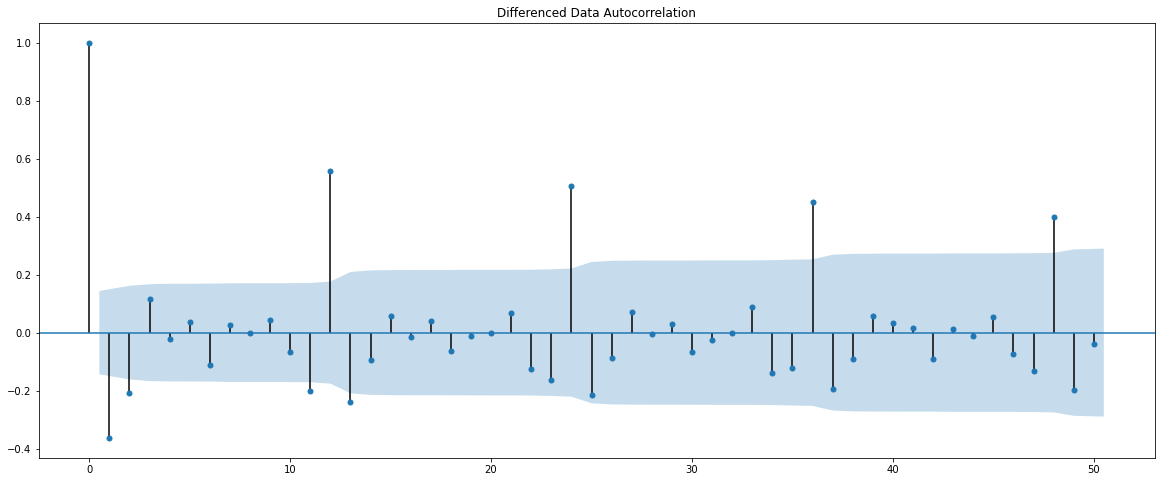

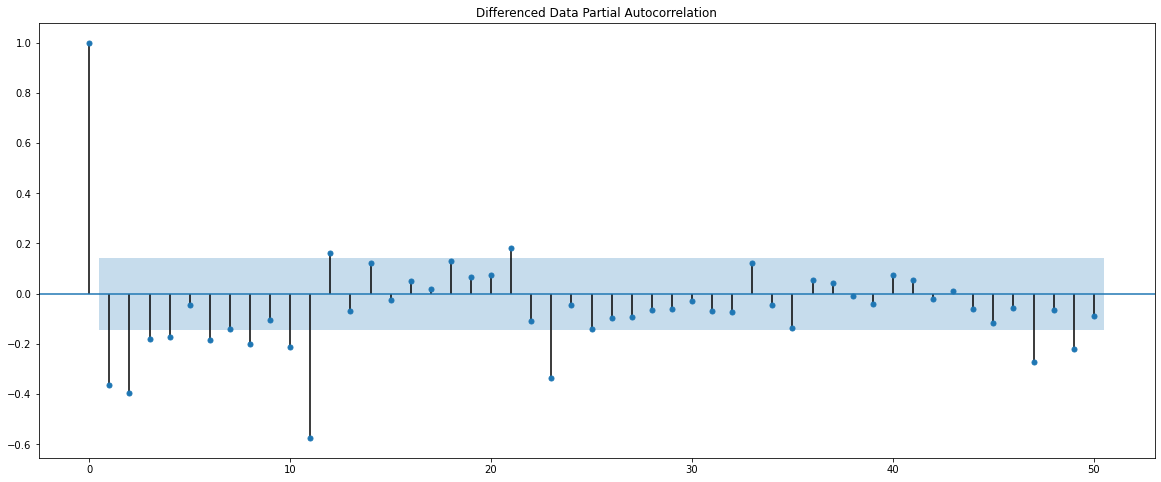

In [164]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

We see that there can be a seasonality of  12. We will run our auto SARIMA models by setting seasonality both as 6 and 12

## Setting the seasonality as 12 for the second iteration of the auto SARIMA model

In [165]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

In [166]:
import itertools
p = q = range(2,5)
P = Q = range(0,3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print(f'Model: {pdq[i]}{model_pdq[i]}')

Examples of some parameter combinations for Model...
Model: (2, 1, 3)(0, 0, 1, 12)
Model: (2, 1, 4)(0, 0, 2, 12)
Model: (3, 1, 2)(1, 0, 0, 12)
Model: (3, 1, 3)(1, 0, 1, 12)
Model: (3, 1, 4)(1, 0, 2, 12)
Model: (4, 1, 2)(2, 0, 0, 12)
Model: (4, 1, 3)(2, 0, 1, 12)
Model: (4, 1, 4)(2, 0, 2, 12)


In [167]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [168]:

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model =SARIMAX(train['Rose'],
                                            order=param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        print(f'SARIMA{param}x{param_seasonal} - AIC:{results_SARIMA.aic}')
        
        SARIMA_AIC = SARIMA_AIC.append({'param':param,
                                        'seasonal':param_seasonal ,
                                        'AIC': results_SARIMA.aic},
                                       ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116565873


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643681363245


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3259138201548


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912711165868


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909349806822


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661538096455


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464978705166


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.378248834307


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6688478062797


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.870629587377


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.807333811479


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349543718149


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1074.3354145881717


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.0461970614904


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483464590572


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579359092464


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2329173244647


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191798023196


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 4)x(0, 0, 0, 12) - AIC:1226.8912370250712


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 4)x(0, 0, 1, 12) - AIC:1071.77385969271


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 4)x(0, 0, 2, 12) - AIC:900.9662287894745


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 4)x(1, 0, 0, 12) - AIC:1072.1986205881417


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 4)x(1, 0, 1, 12) - AIC:1021.224980000715


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 4)x(1, 0, 2, 12) - AIC:880.5769442424959


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 4)x(2, 0, 0, 12) - AIC:892.4706710594745


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 4)x(2, 0, 1, 12) - AIC:894.040576635557


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 4)x(2, 0, 2, 12) - AIC:878.334824433372


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835368991935


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092401843004


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980477241822


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776212660922


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260516956866


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875195526087


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3180342456


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277831452633


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.291983441386


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385820791308


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.539774907758


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.3342599792859


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.9912705134554


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7660283237042


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:887.7878090821504


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463741095883


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217140135262


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595614640775


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 4)x(0, 0, 0, 12) - AIC:1229.5959545292226


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 4)x(0, 0, 1, 12) - AIC:1064.3101098866316


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 4)x(0, 0, 2, 12) - AIC:902.7693699477242


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 4)x(1, 0, 0, 12) - AIC:1062.9224223337878


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 4)x(1, 0, 1, 12) - AIC:1021.0430133548907


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 4)x(1, 0, 2, 12) - AIC:882.1651914327745


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 4)x(2, 0, 0, 12) - AIC:885.7295475673352


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 4)x(2, 0, 1, 12) - AIC:887.3143037264427


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(3, 1, 4)x(2, 0, 2, 12) - AIC:872.6089698308517


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 2)x(0, 0, 0, 12) - AIC:1247.2797739297164


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 2)x(0, 0, 1, 12) - AIC:1087.6234965277229


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 2)x(0, 0, 2, 12) - AIC:924.0775749990041


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 2)x(1, 0, 0, 12) - AIC:1059.640753550708


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 2)x(1, 0, 1, 12) - AIC:1039.5950269508894


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 2)x(1, 0, 2, 12) - AIC:911.2624094091168


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 2)x(2, 0, 0, 12) - AIC:880.8722316296374


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 2)x(2, 0, 1, 12) - AIC:881.8622733149887


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 2)x(2, 0, 2, 12) - AIC:883.6752367701785


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 3)x(0, 0, 0, 12) - AIC:1241.5900611621955


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 3)x(0, 0, 1, 12) - AIC:1061.9647610485354


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 3)x(0, 0, 2, 12) - AIC:912.8103798540692


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 3)x(1, 0, 0, 12) - AIC:1044.8049271908217


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 3)x(1, 0, 1, 12) - AIC:1016.9607035141415


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 3)x(1, 0, 2, 12) - AIC:900.6899459181936


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 3)x(2, 0, 0, 12) - AIC:879.9458205046636


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 3)x(2, 0, 1, 12) - AIC:880.959518014984


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 3)x(2, 0, 2, 12) - AIC:882.1409629569237


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 4)x(0, 0, 0, 12) - AIC:1230.7541862079804


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 4)x(0, 0, 1, 12) - AIC:1062.6104460495387


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 4)x(0, 0, 2, 12) - AIC:905.3762179526469


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 4)x(1, 0, 0, 12) - AIC:1054.0470254729426


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 4)x(1, 0, 1, 12) - AIC:1020.6944083840584


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 4)x(1, 0, 2, 12) - AIC:883.4529329055669


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 4)x(2, 0, 0, 12) - AIC:878.595127898433


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 4)x(2, 0, 1, 12) - AIC:880.275877989537


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(4, 1, 4)x(2, 0, 2, 12) - AIC:883.5569320161211


In [169]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
53  (3, 1, 4)  (2, 0, 2, 12)  872.608970
26  (2, 1, 4)  (2, 0, 2, 12)  878.334824
78  (4, 1, 4)  (2, 0, 0, 12)  878.595128
17  (2, 1, 3)  (2, 0, 2, 12)  879.219180
69  (4, 1, 3)  (2, 0, 0, 12)  879.945821

In [170]:

auto_SARIMA_12 =SARIMAX(train['Rose'],
                                order=(3, 1, 4),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)

results_auto_SARIMA_12.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 4)x(2, 0, [1, 2], 12)   Log Likelihood                -424.304
Date:                                 Sun, 23 May 2021   AIC                            872.609
Time:                                         17:36:52   BIC                            904.109
Sample:                                     01-01-1980   HQIC                           885.364
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0214      0.266      0.080      0.936      -0.501       0.543
ar.L2         -0.2026      0.219     -0.926      0.354      -0.631       0.226
ar.L3         -0.5875      0.239     -2.457      0.014      -1.056      -0.119
ma.L1         -0.9328    163.688     -0.006      0.995    -321.755     319.889
ma.L2          0.1572     11.062      0.014      0.989     -21.524      21.839
ma.L3          0.5524     36.702      0.015      0.988     -71.382      72.487
ma.L4         -0.7768    127.203     -0.006      0.995    -250.090     248.536
ar.S.L12       0.3786      0.113      3.360      0.001       0.158       0.599
ar.S.L24       0.3025      0.092      3.279      0.001       0.122       0.483
ma.S.L12       0.0429      0.167      0.257      0.798      -0.285       0.371
ma.S.L24      -0.1001      0.144     -0.696      0.486      -0.382       0.182
sigma2       227.3685   3.72e+04      0.006      0.995   -7.27e+04    7.32e+04
===================================================================================
Ljung-Box (Q):                       23.70   Jarque-Bera (JB):                 1.76
Prob(Q):                              0.98   Prob(JB):                         0.42
Heteroskedasticity (H):               0.83   Skew:                             0.31
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predict on the Test Set using SARIMA model and evaluate the model

In [171]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [172]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  61.545619  15.152003      31.848239      91.242999
1991-02-01  73.808659  15.224329      43.969523     103.647795
1991-03-01  75.096241  15.232328      45.241426     104.951055
1991-04-01  73.484951  15.480564      43.143603     103.826300
1991-05-01  70.188128  15.491703      39.824949     100.551307

In [173]:
rmse_autosarima12 = rmse(test['Rose'],
                         predicted_auto_SARIMA_12.predicted_mean)
print(rmse_autosarima12)

25.737479880342697


In [174]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_autosarima12]}
                           ,index=['SARIMA(3,1,4)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Reg On Time Instances of Rose wine data             15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.09,SimpleExponentialSmoothing               36.796241
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.1,Beta=0.04 ,Gamma=0.00001,TripleExpone...  12.770863
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.086461
ARIMA(0,1,2)                                        15.618147
SARIMA(3,1,4)(2,0,2,12)                             25.737480

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots .

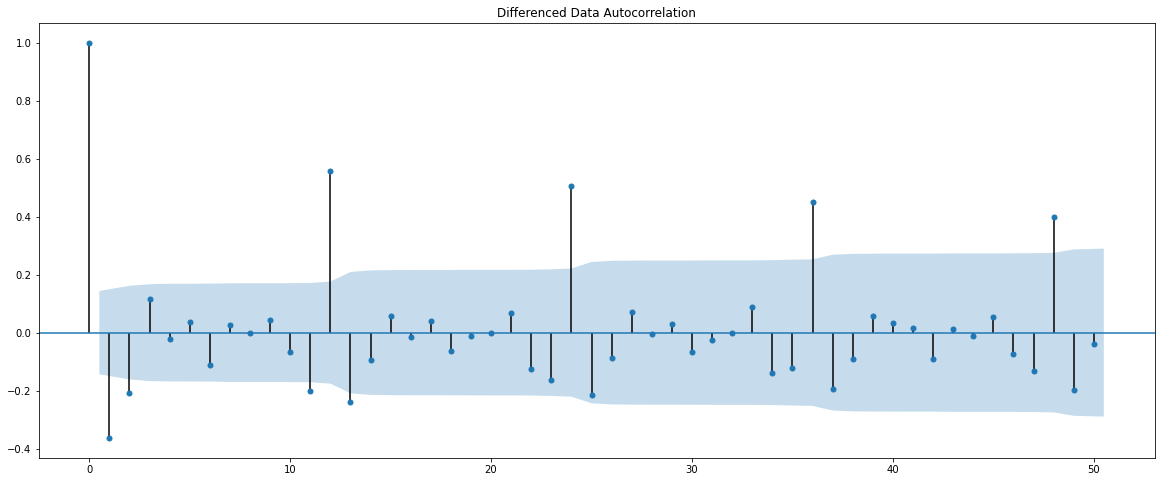

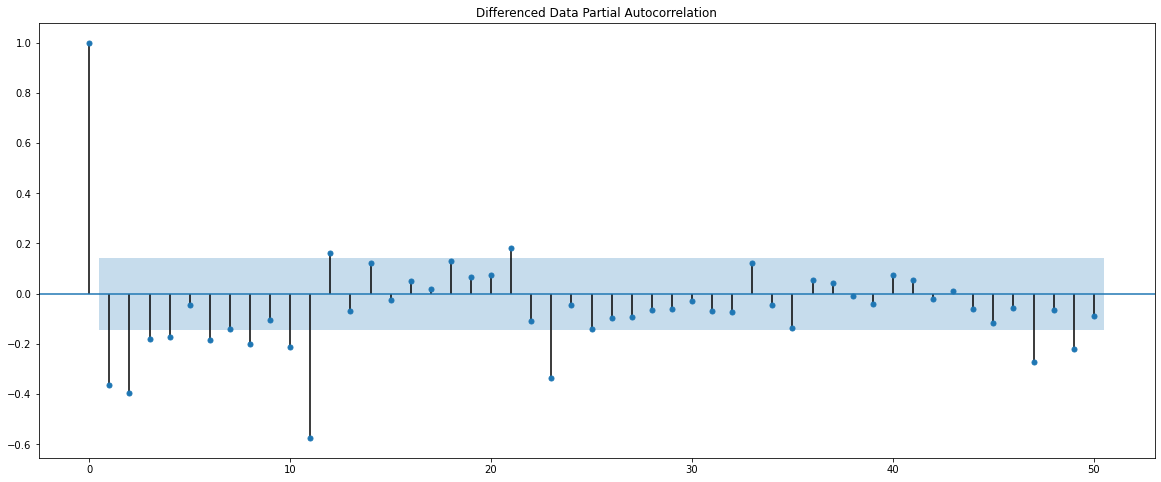

In [175]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 4.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [176]:
manual_ARIMA = ARIMA(train['Rose'], order=(4,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

results_manual_ARIMA.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Sun, 23 May 2021   AIC                           1283.753
Time:                        17:36:54   BIC                           1306.754
Sample:                    02-01-1980   HQIC                          1293.099
                         - 12-01-1990                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose     1.1685      0.087     13.391      0.000       0.997       1.340
ar.L2.D.Rose    -0.3562      0.132     -2.693      0.007      -0.616      -0.097
ar.L3.D.Rose     0.1855      0.132      1.402      0.161      -0.074       0.445
ar.L4.D.Rose    -0.2227      0.091     -2.443      0.015      -0.401      -0.044
ma.L1.D.Rose    -1.9506        nan        nan        nan         nan         nan
ma.L2.D.Rose     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1027           -0.4116j            1.1770           -0.0569
AR.2            1.1027           +0.4116j            1.1770            0.0569
AR.3           -0.6862           -1.6643j            1.8003           -0.3122
AR.4           -0.6862           +1.6643j            1.8003            0.3122
MA.1            0.9753           -0.2209j            1.0000           -0.0355
MA.2            0.9753           +0.2209j            1.0000            0.0355
-----------------------------------------------------------------------------
"""

We get a comparatively simpler model by looking at the ACF and the PACF plots.

Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error when we try to forecast

## Predict on the Test Set using Manual Arima model and evaluate the model

In [177]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [178]:
from statsmodels.tools.eval_measures import rmse
RMSE_manualarima = rmse(test['Rose'],
                        predicted_manual_ARIMA[0])
RMSE_manualarima

33.94925091830237

In [179]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [RMSE_manualarima]}
                           ,index=['Manual ARIMA(4,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Reg On Time Instances of Rose wine data             15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.09,SimpleExponentialSmoothing               36.796241
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.1,Beta=0.04 ,Gamma=0.00001,TripleExpone...  12.770863
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.086461
ARIMA(0,1,2)                                        15.618147
SARIMA(3,1,4)(2,0,2,12)                             25.737480
Manual ARIMA(4,1,2)                                 33.949251

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

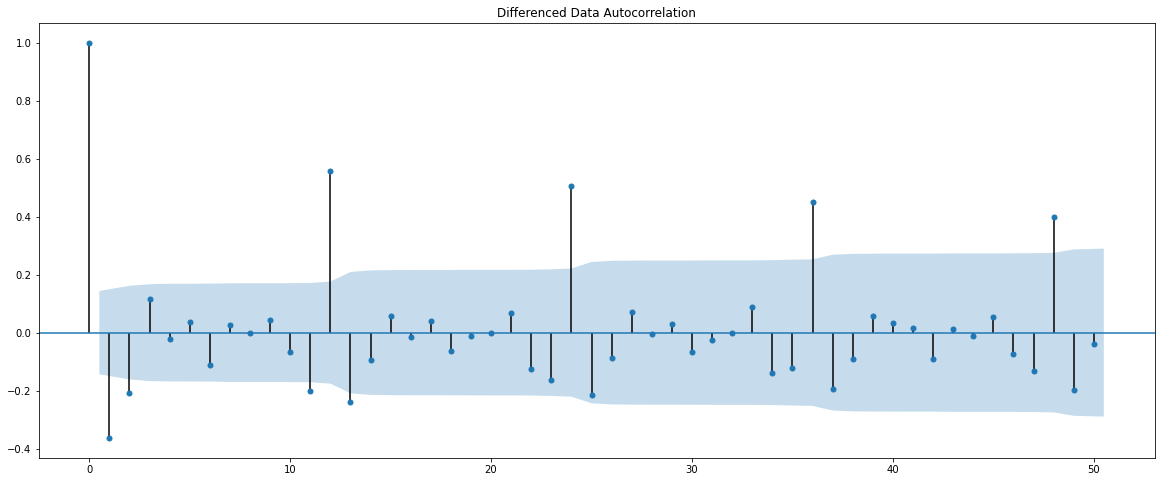

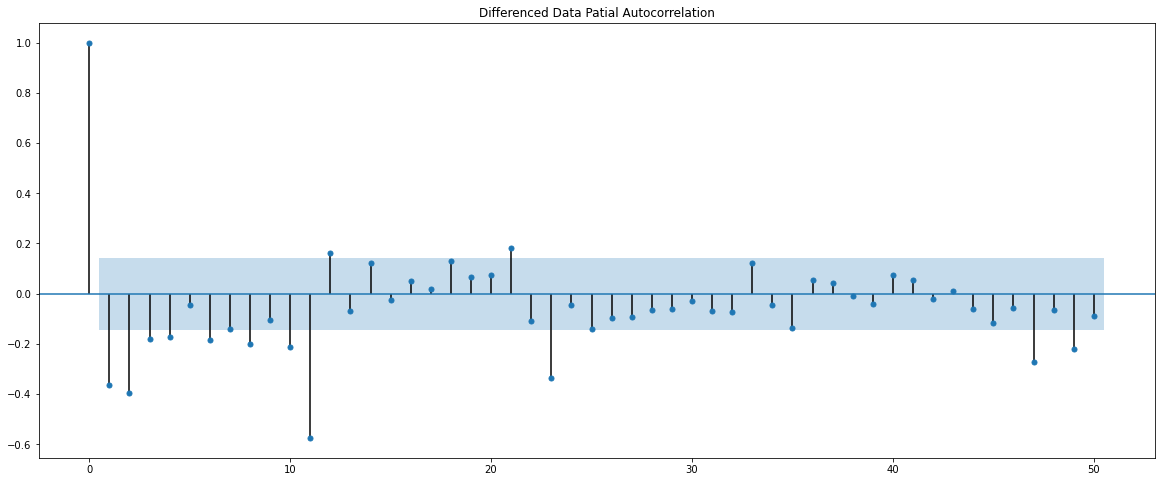

In [180]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

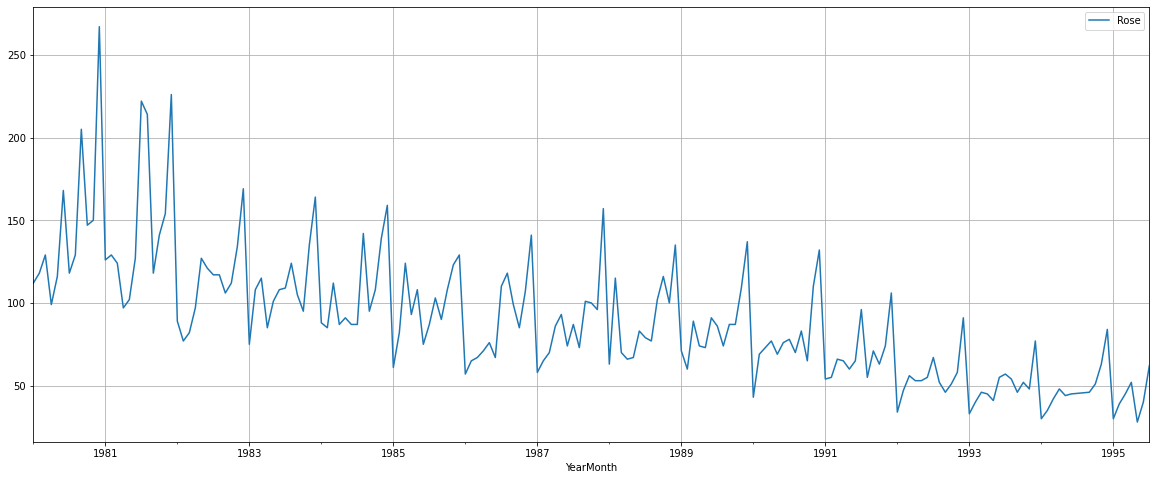

In [181]:
df.plot()
plt.grid();


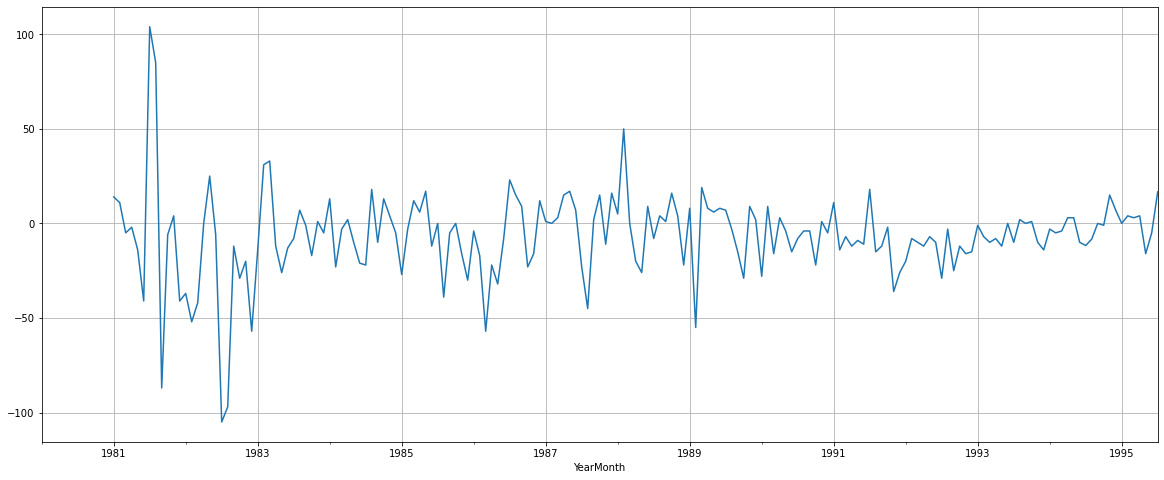

In [182]:
(df['Rose']).diff(12).plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

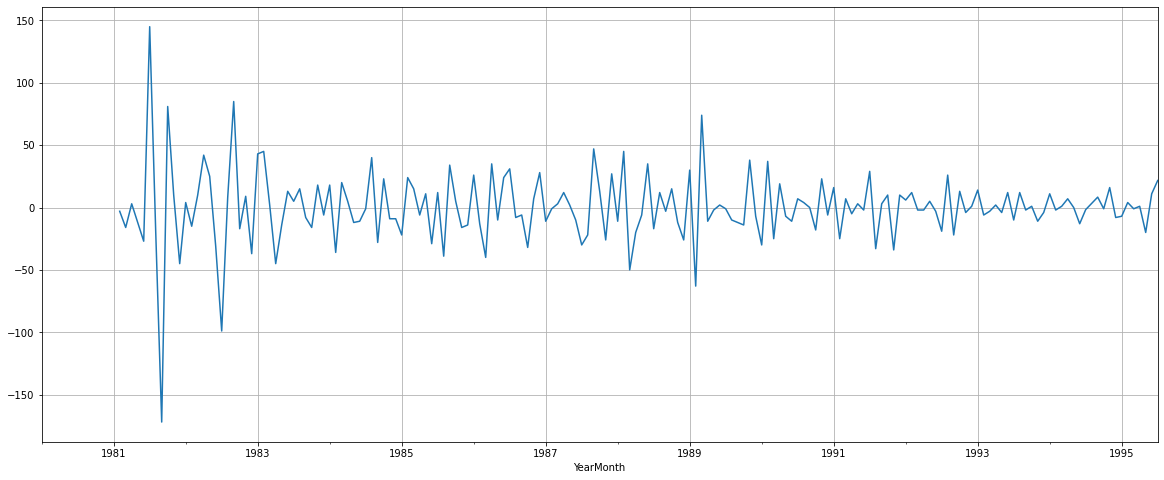

In [183]:
(df['Rose'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

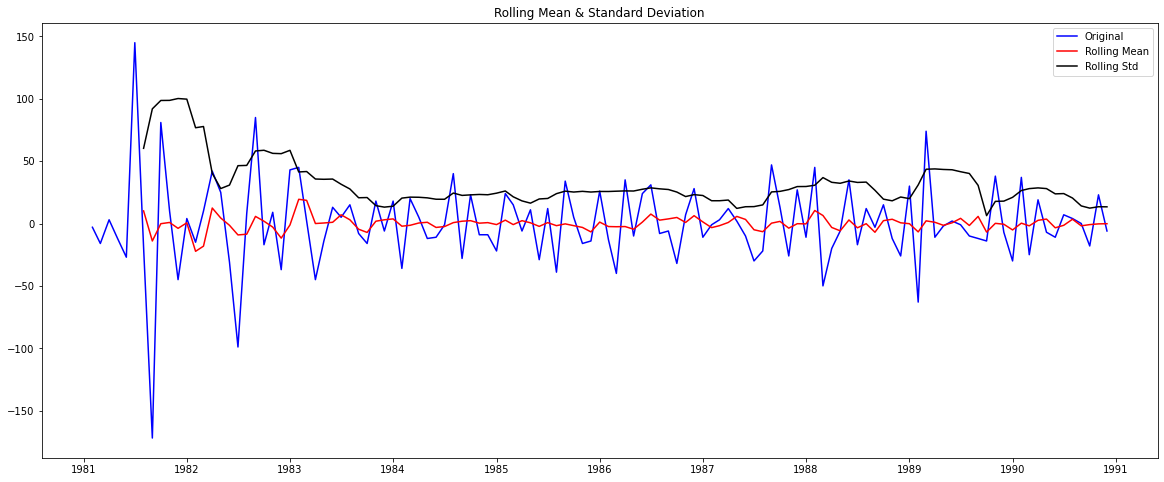

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [184]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

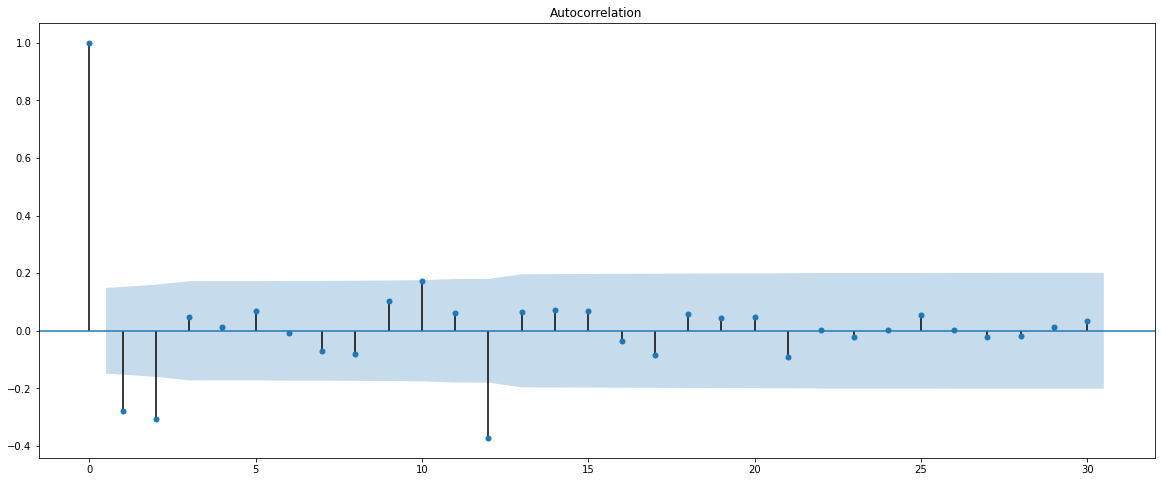

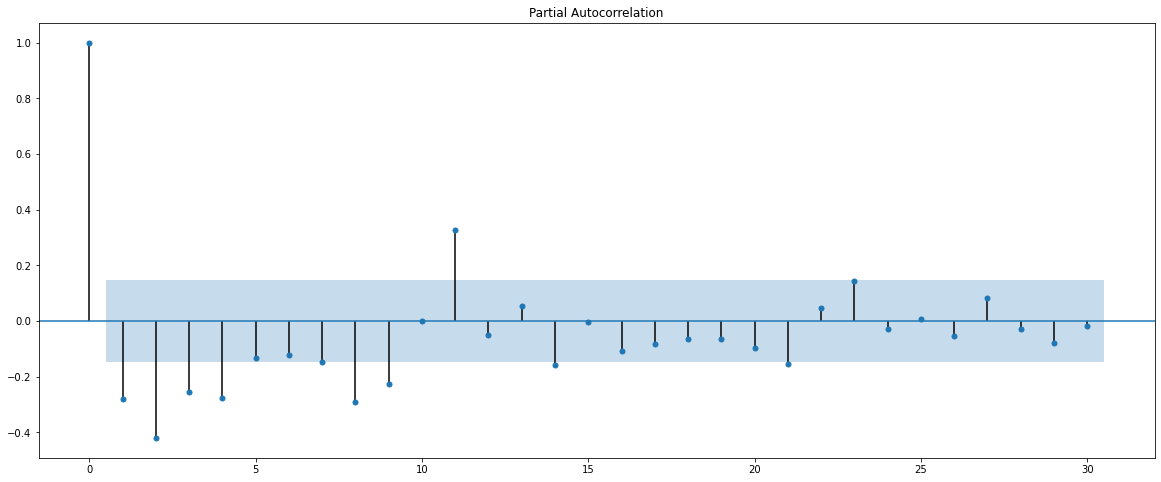

In [185]:
plot_acf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. 

In [186]:

manual_SARIMA_6 =SARIMAX(train['Rose'],
                                order=(4, 1, 2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
results_manual_SARIMA_6.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -446.102
Date:                              Sun, 23 May 2021   AIC                            908.203
Time:                                      17:36:59   BIC                            929.358
Sample:                                  01-01-1980   HQIC                           916.774
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8045      0.119     -6.775      0.000      -1.037      -0.572
ar.L2          0.0390      0.140      0.277      0.781      -0.236       0.314
ar.L3         -0.2307      0.147     -1.566      0.117      -0.519       0.058
ar.L4         -0.1873      0.108     -1.740      0.082      -0.398       0.024
ma.L1          0.1433    138.570      0.001      0.999    -271.450     271.736
ma.L2         -0.8567    118.727     -0.007      0.994    -233.558     231.844
ma.S.L12      -0.5406      0.085     -6.385      0.000      -0.707      -0.375
sigma2       296.7842   4.11e+04      0.007      0.994   -8.03e+04    8.09e+04
===================================================================================
Ljung-Box (Q):                       30.27   Jarque-Bera (JB):                 0.03
Prob(Q):                              0.87   Prob(JB):                         0.98
Heteroskedasticity (H):               0.55   Skew:                            -0.02
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict on the Test Set using SARIMA model and evaluate the model.

In [187]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [188]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  47.470629  17.323348      13.517490      81.423768
1991-02-01  63.353570  18.229024      27.625340      99.081801
1991-03-01  65.515081  18.258534      29.729011     101.301151
1991-04-01  67.317844  18.260958      31.527023     103.108664
1991-05-01  61.757129  18.261254      25.965729      97.548528

In [189]:
rmse_manualsarima6 = rmse(test['Rose'],
                          predicted_manual_SARIMA_6.predicted_mean)
print(rmse_manualsarima6)

15.908674835193569


In [190]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_manualsarima6]}
                           ,index=['Manual SARIMA(4,1,2)(0,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf 

Test RMSE
Reg On Time Instances of Rose wine data             15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.09,SimpleExponentialSmoothing               36.796241
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.1,Beta=0.04 ,Gamma=0.00001,TripleExpone...  12.770863
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.086461
ARIMA(0,1,2)                                        15.618147
SARIMA(3,1,4)(2,0,2,12)                             25.737480
Manual ARIMA(4,1,2)                                 33.949251
Manual SARIMA(4,1,2)(0,1,1,12)                      15.908675

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

In [191]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.086461
2pointTrailingMovingAverage                         11.529278
Alpha=0.1,Beta=0.04 ,Gamma=0.00001,TripleExpone...  12.770863
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Reg On Time Instances of Rose wine data             15.268955
ARIMA(0,1,2)                                        15.618147
Manual SARIMA(4,1,2)(0,1,1,12)                      15.908675
SARIMA(3,1,4)(2,0,2,12)                             25.737480
Manual ARIMA(4,1,2)                                 33.949251
Alpha=0.09,SimpleExponentialSmoothing               36.796241
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
SimpleAverageModel                                  53.460570
NaiveModel                                          79.718773

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Predicting for the Next 12 Months from the basic Models

In [192]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='multiplicative',
seasonal='multiplicative').fit(smoothing_level=0.1,
smoothing_slope=0.2,smoothing_seasonal=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [193]:
RMSE_fullmodel1 = rmse(df['Rose'],
                       fullmodel1.fittedvalues)

RMSE_fullmodel1

20.989816473741495

In [194]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)

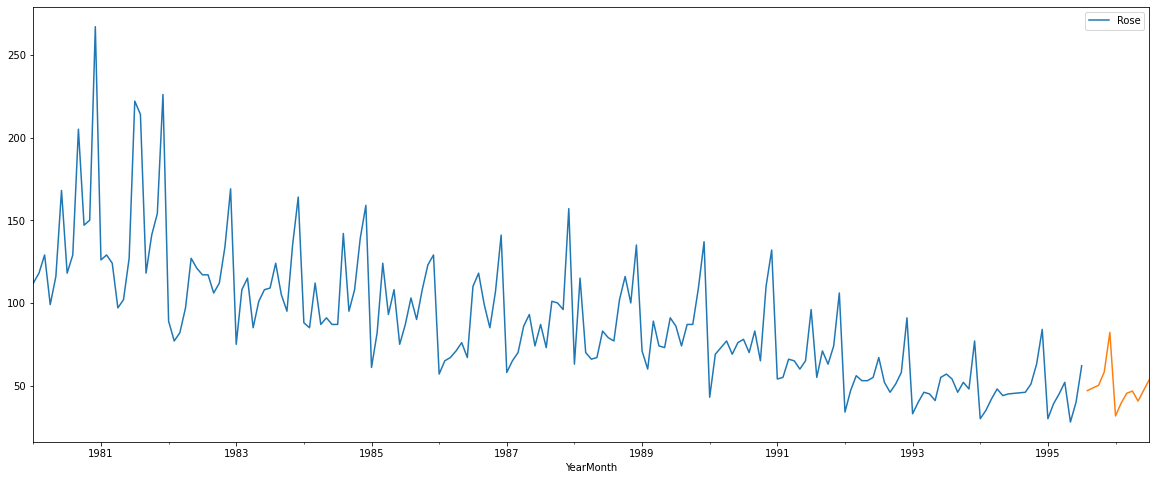

In [195]:
df.plot()
prediction_1.plot();

In [222]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head(12)

lower_CI  prediction    upper_ci
1995-08-01   5.865842   46.981210   88.096577
1995-09-01   7.531661   48.647028   89.762395
1995-10-01   9.059900   50.175267   91.290635
1995-11-01  17.107285   58.222653   99.338020
1995-12-01  41.099343   82.214710  123.330077
1996-01-01  -9.426019   31.689348   72.804715
1996-02-01  -1.675536   39.439831   80.555199
1996-03-01   4.272399   45.387767   86.503134
1996-04-01   5.602565   46.717932   87.833300
1996-05-01  -0.467736   40.647631   81.762998
1996-06-01   6.099780   47.215148   88.330515
1996-07-01  12.542382   53.657749   94.773117

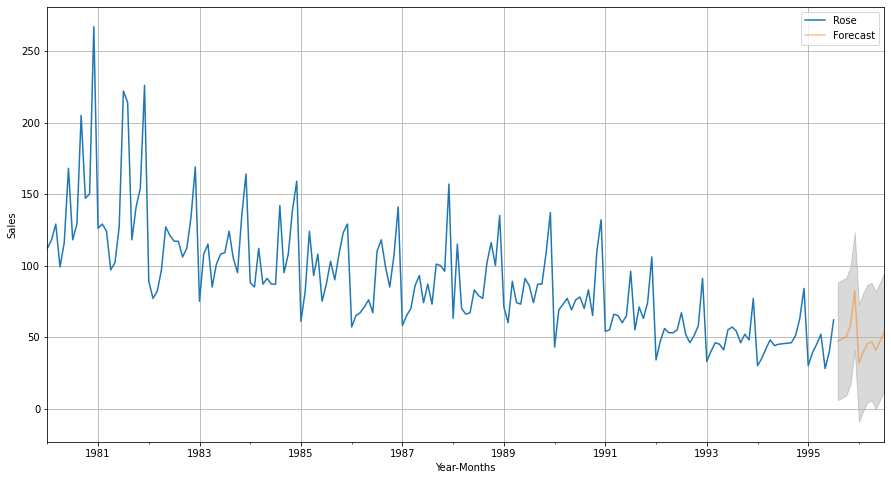

In [197]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

# Prediction Using Sarima

In [227]:
full_data_model = SARIMAX(df['Rose'],
                                order=(4,1,2),
                                seasonal_order=(3,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
results_full_data_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 2)x(3, 1, [1], 12)   Log Likelihood                -535.480
Date:                              Sun, 23 May 2021   AIC                           1092.961
Time:                                      18:37:31   BIC                           1124.837
Sample:                                  01-01-1980   HQIC                          1105.914
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9058      0.112     -8.112      0.000      -1.125      -0.687
ar.L2          0.0291      0.150      0.194      0.847      -0.265       0.323
ar.L3         -0.0691      0.138     -0.502      0.616      -0.339       0.201
ar.L4         -0.1125      0.083     -1.361      0.173      -0.275       0.050
ma.L1          0.1136     25.620      0.004      0.996     -50.101      50.328
ma.L2         -0.8863     22.703     -0.039      0.969     -45.383      43.610
ar.S.L12       0.1103      0.101      1.088      0.276      -0.088       0.309
ar.S.L24      -0.0371      0.078     -0.475      0.635      -0.190       0.116
ar.S.L36      -0.0020      0.019     -0.104      0.917      -0.039       0.035
ma.S.L12      -0.7546      0.130     -5.791      0.000      -1.010      -0.499
sigma2       161.4002   4128.339      0.039      0.969   -7929.996    8252.797
===================================================================================
Ljung-Box (Q):                       43.44   Jarque-Bera (JB):                 6.94
Prob(Q):                              0.33   Prob(JB):                         0.03
Heteroskedasticity (H):               0.29   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [228]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [229]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head(12)

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  44.008462  12.779461      18.961179      69.055744
1995-09-01  45.341937  13.022590      19.818129      70.865745
1995-10-01  45.074894  13.059566      19.478615      70.671174
1995-11-01  57.666436  13.112306      31.966789      83.366083
1995-12-01  85.519126  13.114081      59.816000     111.222253
1996-01-01  21.305729  13.324327      -4.809472      47.420931
1996-02-01  31.637374  13.336056       5.499185      57.775563
1996-03-01  37.632518  13.532310      11.109678      64.155358
1996-04-01  39.663866  13.547227      13.111790      66.215942
1996-05-01  29.924750  13.704729       3.063975      56.785524
1996-06-01  37.498859  13.728378      10.591733      64.405986
1996-07-01  49.799119  13.861194      22.631679      76.966560

In [230]:
rmse_full_data = rmse(df['Rose'],results_full_data_model.fittedvalues)
rmse_full_data

39.12958473501778

In [219]:
pred_full_manual_SARIMA_data = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',periods=12,freq='M'))

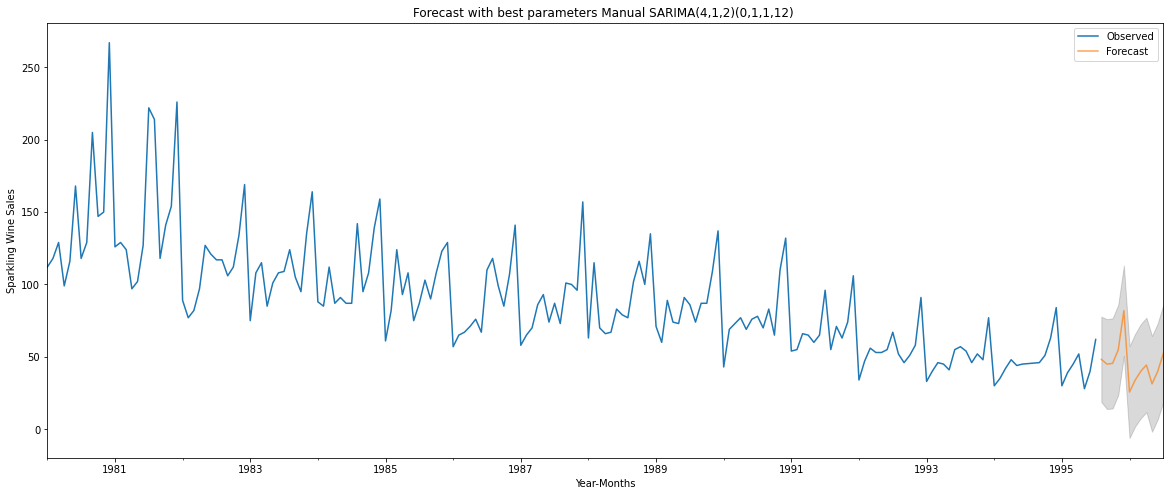

In [221]:
# plot the forecast along with the confidence band

axis = df['Rose'].plot(label='Observed')

pred_full_manual_SARIMA_data['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.fill_between(pred_full_manual_SARIMA_data.index, 
                  pred_full_manual_SARIMA_data['mean_ci_lower'], 
                  pred_full_manual_SARIMA_data['mean_ci_upper'], 
                  color='k', alpha=.15)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Wine Sales')
plt.legend(loc='best')
plt.title('Forecast with best parameters Manual SARIMA(4,1,2)(0,1,1,12) ')
plt.show()